In [58]:
MyData <- read.csv2(file="D:\\Daten\\DISS\\Daten\\Estrategias_Estudiantes_Kienberger_ber.csv", 
                    header=TRUE, sep=",", fileEncoding = "UTF-16", na.strings=c("NA","NaN", ""))

In [59]:
head(MyData,n = 3)

X,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,D.Q8b22c,D.Q9_1,D.Q9_2,E.T1,E.Q1,LocationLatitude,LocationLongitude,LocationAccuracy,Unnamed..442,porc_nan
0,R_1kOiXpqqaX3Irxm,Default Response Set,Anonymous,NA,NA,88.3.172.215,0,2017-11-09 13:10:29,2017-11-09 13:25:39,...,NA,NA,1.0,1,Gratificante y útil,40.968795776367,-5.6638946533203,-1,NA,71.84684684684684
1,R_1F5FzvY7aYwiipy,Default Response Set,Anonymous,NA,NA,212.128.135.110,0,2017-11-10 01:39:27,2017-11-10 01:54:25,...,NA,NA,1.0,1,Una encuesta muy completa que me ha servido para reflexionar sobre mis estrategias a la hora de comprender palabras desconocidas en alemán y a incluir nuevas. / Enhorabuena.,40.96809387207,-5.6620025634766,-1,NA,70.27027027027027
2,R_2ErWjTyNYcSh10N,Default Response Set,Anonymous,NA,NA,212.128.135.84,0,2017-11-10 02:23:28,2017-11-10 02:39:04,...,NA,NA,1.0,1,NA,40.96809387207,-5.6620025634766,-1,NA,70.72072072072072


In [60]:
dim(MyData)

[1]  67 445

zeigt Dimensionen = Zahl der Zeilen + Spalten an

In [61]:
colnames(MyData)[22:28]

[1] "A_Q2_1" "A_Q2_2" "A_Q2_3" "A_Q2_4" "A_Q2_5" "A_Q2_6" "A_Q2_7"

gibt Namen der Spalten eines Datensets an, von Zeile ... bis ...

### Likert-Variablen auswählen

Spalten, die Likert-Items enthalten, werden ausgewählt und in Vektoren zusammengefasst

* <- entspricht =, d. h. Zuweisung, Definition
* for (... in ...){ ...} (Wichtig: Klammern richtig setzen, keine vergessen)
* if (...) (hier Konditionen eingeben, mehrere durch Komma trennen) {...} (hier eingeben, was gemacht werden soll - in diesem Beispiel etwas hinzufügen, wenn eine bestimmte Kondition zutrifft)
* c() = leerer Vektor (so wie in Python [] für Listen)

In [62]:
get_vec <- function(df,name){
    vec <- c()
    for (i in 1:ncol(df)){
        if (grepl(name, colnames(df)[i]) & !grepl("TEXT",colnames(df)[i]) ){
            vec <- c(vec, i)
        }
    }
    vec
}

In [63]:
vec_AQ2 <- get_vec(MyData,"A_Q2")
vec_AQ3 <- get_vec(MyData,"A_Q3")
vec_CQ1 <- get_vec(MyData,"C_Q1")

In [64]:
vec_ACQ <- c(vec_AQ2,vec_AQ3,vec_CQ1)

In [65]:
colnames(MyData)[vec_ACQ]

[1] "A_Q2_1"  "A_Q2_2"  "A_Q2_3"  "A_Q2_4"  "A_Q2_5"  "A_Q2_6"  "A_Q2_7" 
 [8] "A_Q3_1"  "A_Q3_2"  "A_Q3_3"  "A_Q3_4"  "A_Q3_5"  "A_Q3_6"  "A_Q3_7" 
[15] "A_Q3_8"  "A_Q3_9"  "A_Q3_10" "A_Q3_30" "A_Q3_11" "A_Q3_12" "A_Q3_13"
[22] "A_Q3_14" "A_Q3_31" "A_Q3_15" "A_Q3_16" "A_Q3_17" "A_Q3_18" "A_Q3_19"
[29] "A_Q3_20" "A_Q3_21" "A_Q3_22" "A_Q3_23" "A_Q3_24" "A_Q3_25" "A_Q3_26"
[36] "A_Q3_27" "A_Q3_32" "A_Q3_33" "A_Q3_28" "A_Q3_29" "C_Q1_1"  "C_Q1_2" 
[43] "C_Q1_3"  "C_Q1_4"  "C_Q1_5"  "C_Q1_6"  "C_Q1_7"  "C_Q1_8"  "C_Q1_9" 
[50] "C_Q1_10" "C_Q1_11"

#### Funktion für Datenformat (Integer)

In [66]:
convert_data <- function(df,cols){
    X <- df[,cols]
    X <- do.call(cbind.data.frame,lapply(X,function(x) as.integer(as.character(x))))
    colnames(X) <- colnames(df)[cols]
    X
}

### Deskriptive Analyse

In [67]:
library("psych")

In [68]:
describe(MyData[vec_AQ2])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
A_Q2_1,1,67,2.447761,1.0629231,2,2.381818,1.4826,1,5,4,0.4700525,-0.3355793,0.12985672
A_Q2_2,2,67,3.552239,0.7443440,4,3.563636,1.4826,2,5,3,-0.1760789,-0.3450153,0.09093609
A_Q2_3,3,67,4.134328,0.8685677,4,4.218182,1.4826,2,5,3,-0.6657407,-0.4485494,0.10611243
A_Q2_4,4,67,4.313433,0.8740182,5,4.418182,0.0000,1,5,4,-1.1729583,1.2052960,0.10677831
A_Q2_5,5,67,3.283582,1.0560930,3,3.345455,1.4826,1,5,4,-0.5721445,-0.1412295,0.12902230
A_Q2_6,6,67,3.000000,1.3257359,3,3.000000,1.4826,1,5,4,-0.0384331,-1.1059861,0.16196442
A_Q2_7,7,67,4.283582,0.9817420,5,4.454545,0.0000,1,5,4,-1.3351726,1.0792439,0.11993887


In [69]:
describe(MyData[vec_AQ3])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
A_Q3_1,1,67,3.059701,1.1399176,3,3.072727,1.4826,1,5,4,0.006303073,-0.77228797,0.13926309
A_Q3_2*,2,66,4.060606,0.9426442,4,4.185185,1.4826,1,5,4,-0.986136886,0.64490659,0.11603148
A_Q3_3*,3,65,2.953846,1.4623480,3,2.943396,1.4826,1,5,4,0.019464360,-1.41215476,0.18138194
A_Q3_4,4,67,4.208955,0.9619632,4,4.363636,1.4826,1,5,4,-1.222246164,0.98794741,0.11752251
A_Q3_5,5,67,3.223881,1.1783514,3,3.254545,1.4826,1,5,4,-0.157835412,-0.96579038,0.14395853
A_Q3_6,6,67,2.970149,1.2669475,3,2.963636,1.4826,1,5,4,0.054963146,-1.13281055,0.15478228
A_Q3_7,7,67,3.940299,0.9981892,4,4.036364,1.4826,2,5,3,-0.513345084,-0.88887243,0.12194822
A_Q3_8,8,67,4.000000,1.0444659,4,4.127273,1.4826,1,5,4,-0.707352863,-0.44154229,0.12760182
A_Q3_9,9,67,3.970149,1.1277512,4,4.127273,1.4826,1,5,4,-1.003986622,0.21136754,0.13777673
A_Q3_10,10,67,4.313433,0.8911850,5,4.454545,0.0000,2,5,3,-1.146128430,0.39784093,0.10887558


In [70]:
describe(MyData[vec_CQ1])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
C_Q1_1,1,67,3.820896,0.8151106,4,3.854545,1.4826,2,5,3,-0.3321907,-0.4014233,0.09958161
C_Q1_2,2,67,4.522388,0.6822025,5,4.636364,0.0000,2,5,3,-1.3486447,1.5248162,0.08334430
C_Q1_3,3,67,3.686567,1.1442737,4,3.763636,1.4826,1,5,4,-0.3952654,-0.8786803,0.13979528
C_Q1_4,4,67,4.253731,0.8042177,4,4.363636,1.4826,1,5,4,-1.3368140,2.7629668,0.09825083
C_Q1_5,5,67,4.447761,0.7644285,5,4.563636,0.0000,2,5,3,-1.1300700,0.2995732,0.09338981
C_Q1_6,6,67,4.567164,0.7011653,5,4.690909,0.0000,2,5,3,-1.7939623,3.3257190,0.08566097
C_Q1_7,7,67,4.194030,0.9250521,4,4.309091,1.4826,2,5,3,-0.8364918,-0.3792069,0.11301310
C_Q1_8,8,67,2.537313,1.1848585,2,2.454545,1.4826,1,5,4,0.4508764,-0.6833641,0.14475350
C_Q1_9,9,67,4.373134,0.7752970,5,4.490909,0.0000,2,5,3,-1.1174109,0.7440720,0.09471761
C_Q1_10,10,67,2.208955,1.1617296,2,2.090909,1.4826,1,5,4,0.7382389,-0.4129493,0.14192785


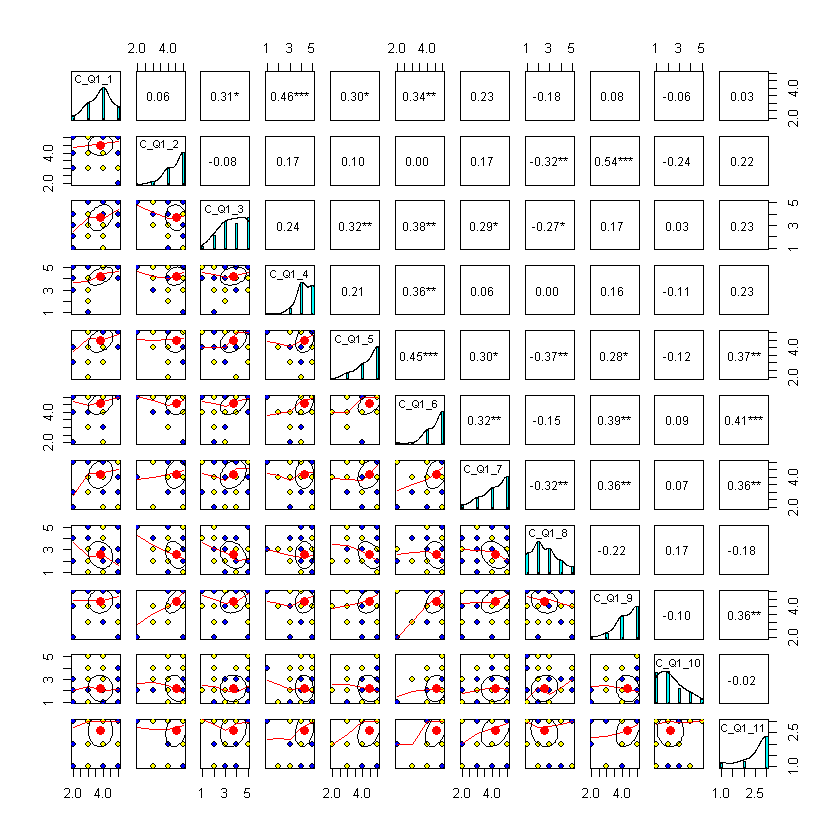

In [71]:
pairs.panels(MyData[vec_CQ1],bg=c("yellow","blue"),pch=21,stars=TRUE)

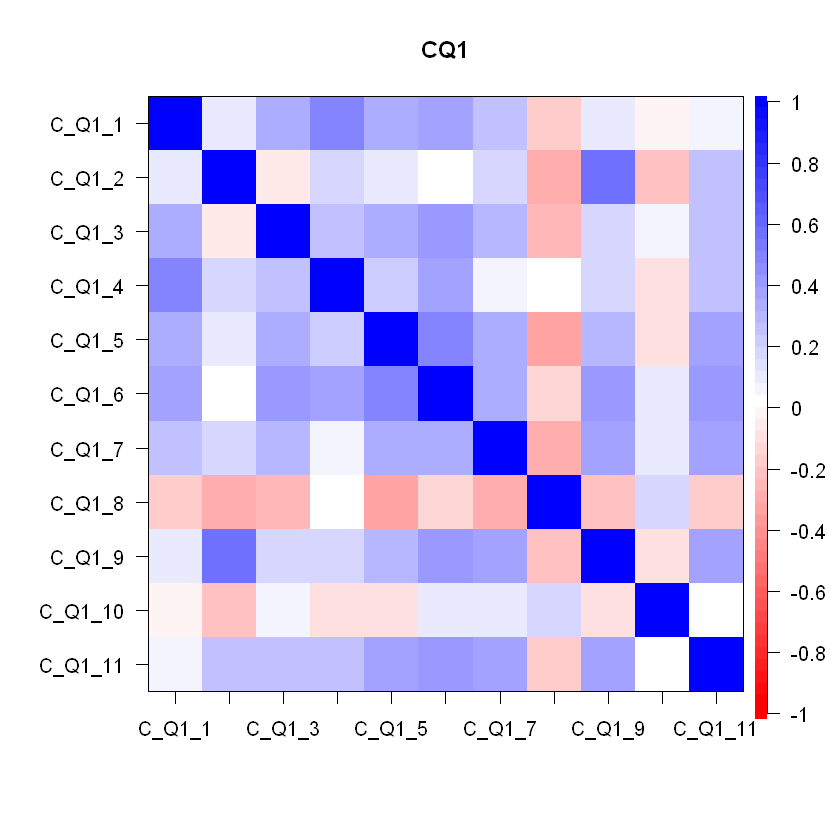

In [72]:
 corPlot(convert_data(MyData,vec_CQ1),main='CQ1')

### Explorative Faktorenanalyse

Parallel analysis suggests that the number of factors =  8  and the number of components =  3 


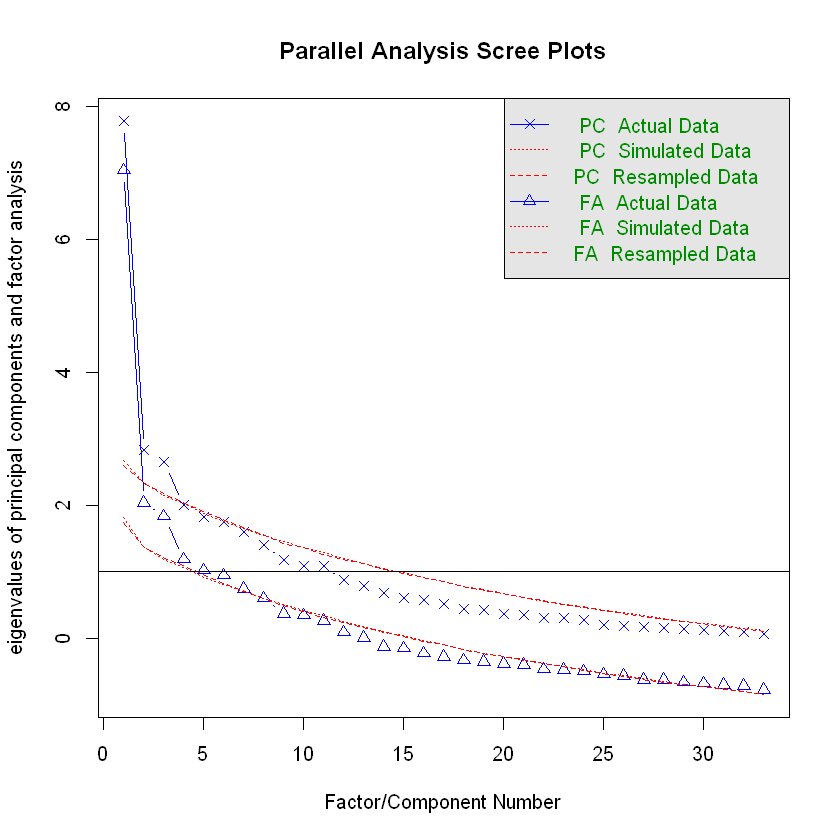

In [73]:
items.parallel <- fa.parallel(convert_data(MyData,c(vec_AQ3)), fa="both")

Test mit Itemgruppe AQ2+AQ3 ergibt 9 Faktoren, 3 Komponenten; in der Faktorenanalyse zeigt sich allerdings, dass diese kombinierte Analyse zu keinen sinnvollen Ergebnissen führt -> nur AQ3 analysieren

### Faktorenanalyse

Tests mit Itemgruppen AQ2 und CQ1 haben gezeigt, dass für diese die Anwendung einer Faktorenanalyse nicht sinnvoll ist - weder in der jeweiligen Gruppe noch in Kombination (es ist sinnvoll, diese Teile in der Befragung zu trennen und auch getrennt zu analysieren)

(Formeln/Programme beinhalten schon Kontrolle, ob Faktorenanalyse sinnvoll durchgeführt werden kann; ev. Bsp. nennen?; Alternative: unabhängig Kaiser-Meyer-Olkin(KMO) measure of sample adequacy durchführen)

Test für 7 Faktoren wie vorgeschlagen ergibt weniger sinnvolle Faktorengruppen als mit 8 Faktoren

* FA_AQ3 <- fa(convert_data(MyData,vec_AQ3), nfactors = 7, rotate = "varimax")
* plot(FA_AQ3) (zum Darstellen, diagram(FA_AQ3) aber sinnvoller)

neuerlich Parallel Analysis laufen lassen (vgl. oben) ergibt doch 8 Faktoren (? - aber umso besser!)

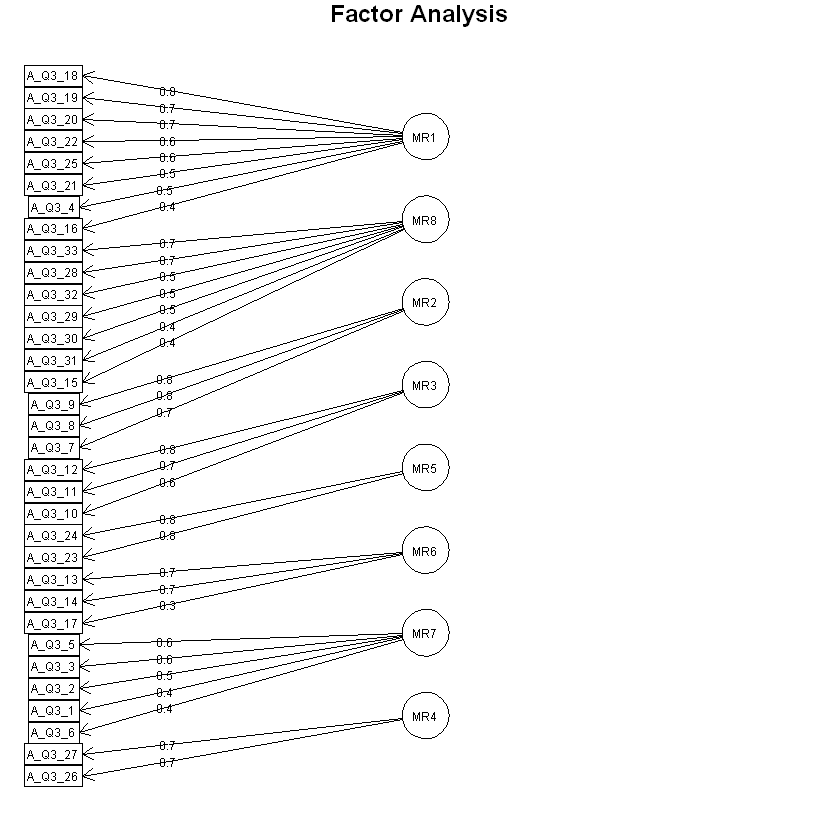

In [74]:
FA_AQ3 <- fa(convert_data(MyData,vec_AQ3), nfactors = 8, rotate = "varimax")
diagram(FA_AQ3)

### Hypothese zum Ergebnis der explorativen Faktorenanalyse:

* MR1: Kontextwissen (Textsorte, behandeltes Thema, kulturelles Wissen...)
* MR2: Wortbildung, morphosyntaktische Regularitäten
* MR3: Syntax, Orthographie
* MR4: Internet
* MR5: Bilder, Grafiken, Symbole, Zahlen
* MR6: semantische Relationen
* MR7: Sprachenvergleich (! Individuen können aufgrund ihrer Vorkenntnisse Strategien unterschiedlich gut nützen)
* MR8: metakognitive Strategien

In [75]:
FA_AQ3

Factor Analysis using method =  minres
Call: fa(r = convert_data(MyData, vec_AQ3), nfactors = 8, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
          MR1   MR8   MR2   MR3   MR5   MR6   MR7   MR4   h2   u2 com
A_Q3_1   0.29 -0.14  0.09  0.40  0.07  0.15  0.41  0.08 0.47 0.53 3.6
A_Q3_2   0.23  0.06  0.30  0.07  0.12  0.00  0.47  0.32 0.48 0.52 3.4
A_Q3_3   0.13 -0.10  0.00 -0.12  0.30  0.11  0.59 -0.08 0.50 0.50 1.9
A_Q3_4   0.46  0.18  0.09  0.21  0.14 -0.11  0.23  0.39 0.54 0.46 3.8
A_Q3_5   0.05  0.26  0.00  0.00  0.05 -0.03  0.62  0.20 0.49 0.51 1.6
A_Q3_6   0.28  0.10  0.22  0.18 -0.31  0.11  0.36  0.17 0.44 0.56 5.2
A_Q3_7   0.00  0.10  0.74  0.18 -0.15  0.05  0.06  0.05 0.62 0.38 1.3
A_Q3_8   0.14  0.15  0.77  0.30  0.07  0.19  0.11 -0.12 0.79 0.21 1.7
A_Q3_9   0.09  0.21  0.82  0.14 -0.03  0.02  0.01  0.06 0.76 0.24 1.2
A_Q3_10  0.09  0.00  0.31  0.56  0.11 -0.06  0.09  0.08 0.45 0.55 1.8
A_Q3_30  0.22  0.48  0.25  0.12 -0.03  0.27 

### GRM

In [76]:
IRT_AQ3 <- irt.fa(convert_data(MyData,vec_AQ3),nfactors = 8,rotate = "varimax", plot = FALSE)

Warning message in matpLower(x, nvar, gminx, gmaxx, gminy, gmaxy):
"528 cells were adjusted for 0 values using the correction for continuity. Examine your data carefully."

In [77]:
IRT_AQ3

Item Response Analysis using Factor Analysis  

Call: irt.fa(x = convert_data(MyData, vec_AQ3), nfactors = 8, plot = FALSE, 
    rotate = "varimax")

Factor analysis with Call: fa(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, 
    fm = fm)

Test of the hypothesis that 8 factors are sufficient.
The degrees of freedom for the model is 292  and the objective function was  2.9 
The number of observations was  67  with Chi Square =  141.55  with prob <  1 

The root mean square of the residuals (RMSA) is  0.04 
The df corrected root mean square of the residuals is  0.05 

Tucker Lewis Index of factoring reliability =  2.38
RMSEA index =  0  and the 10 % confidence intervals are  0 0
BIC =  -1086.22

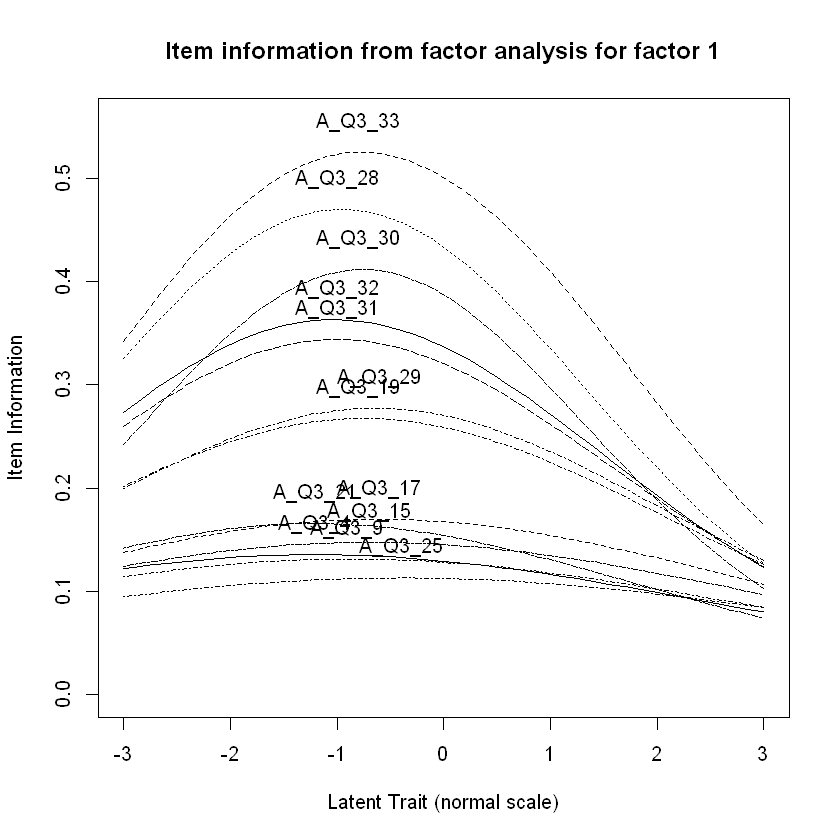

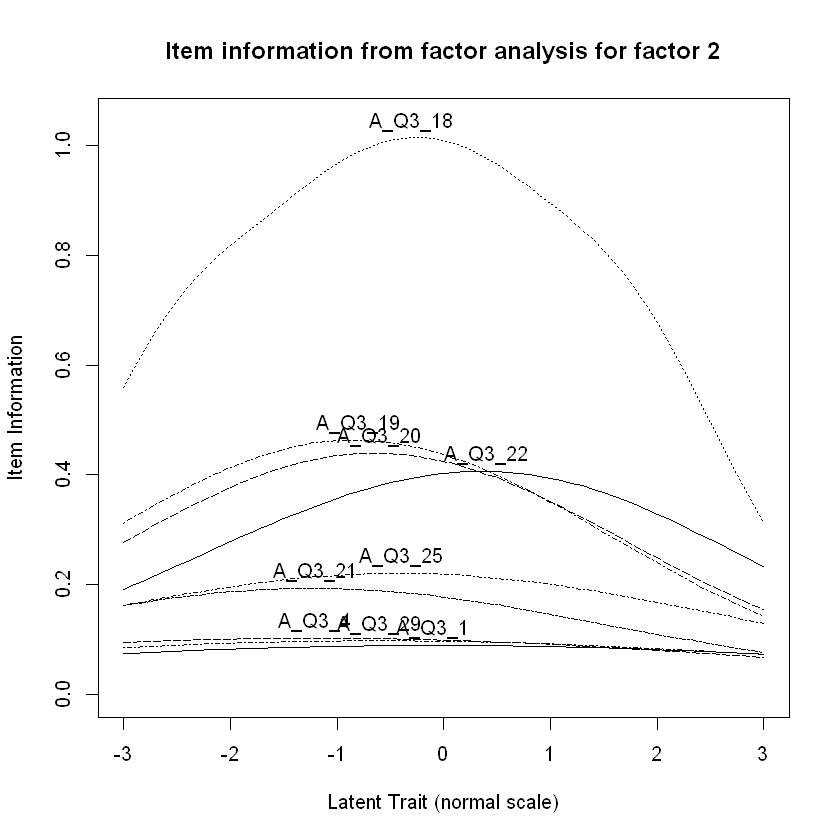

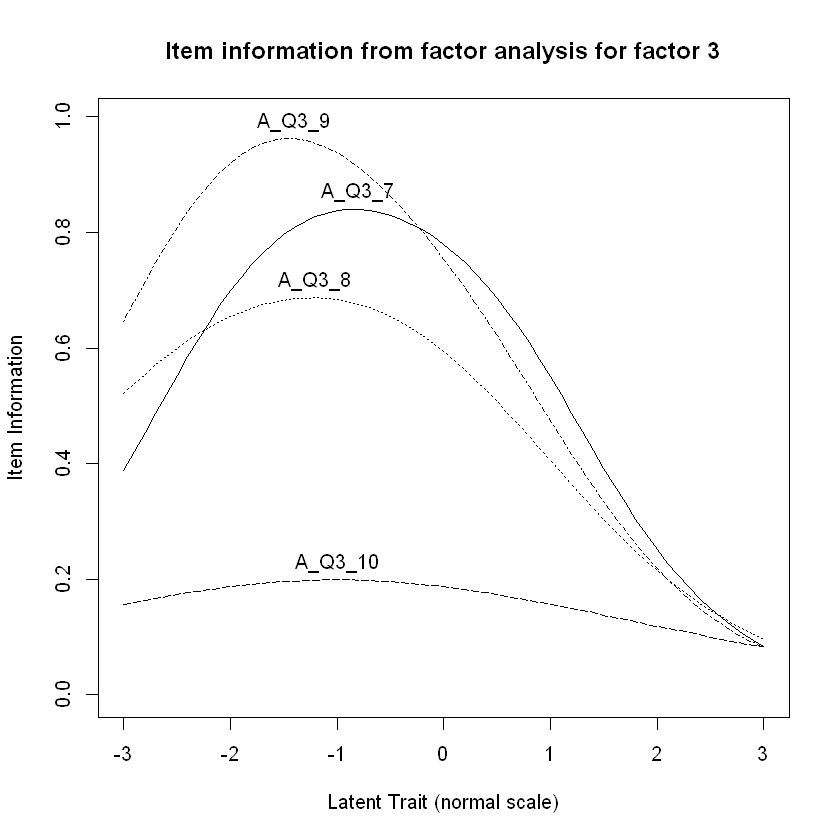

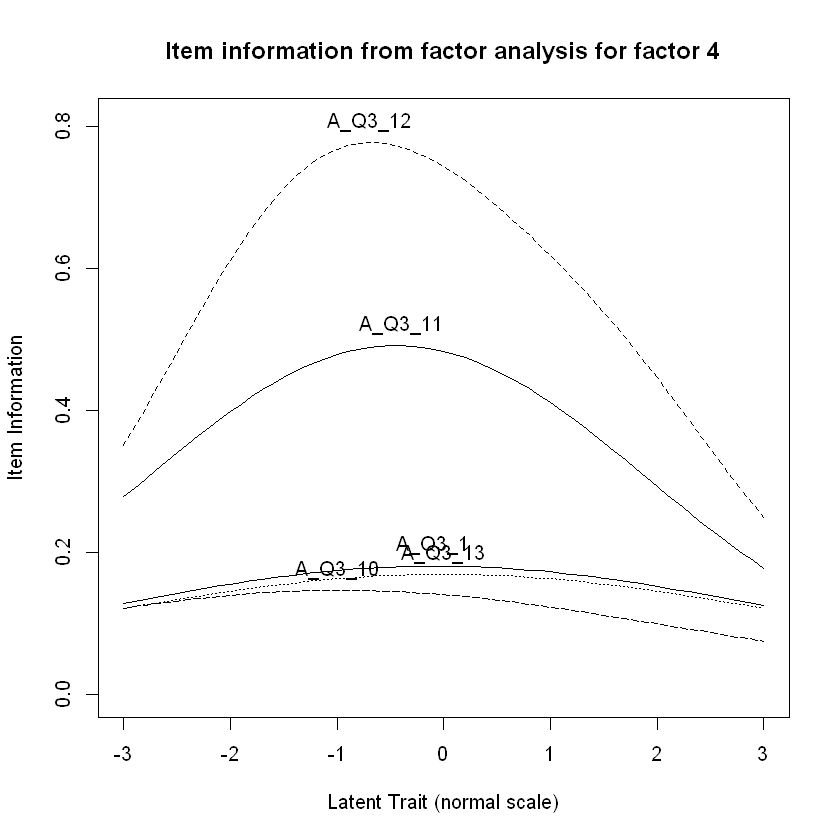

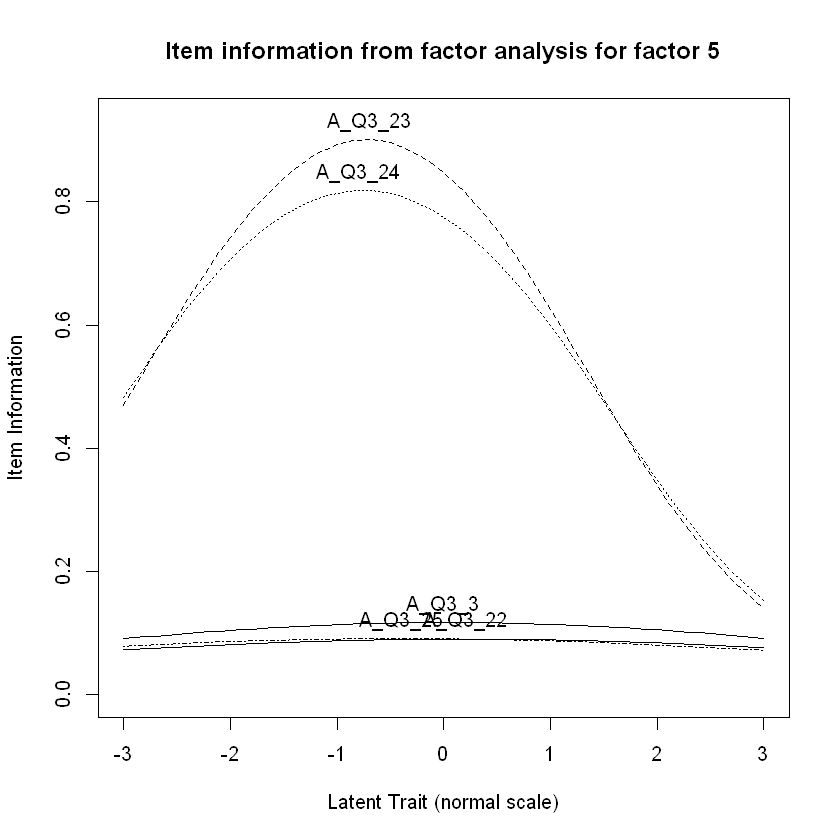

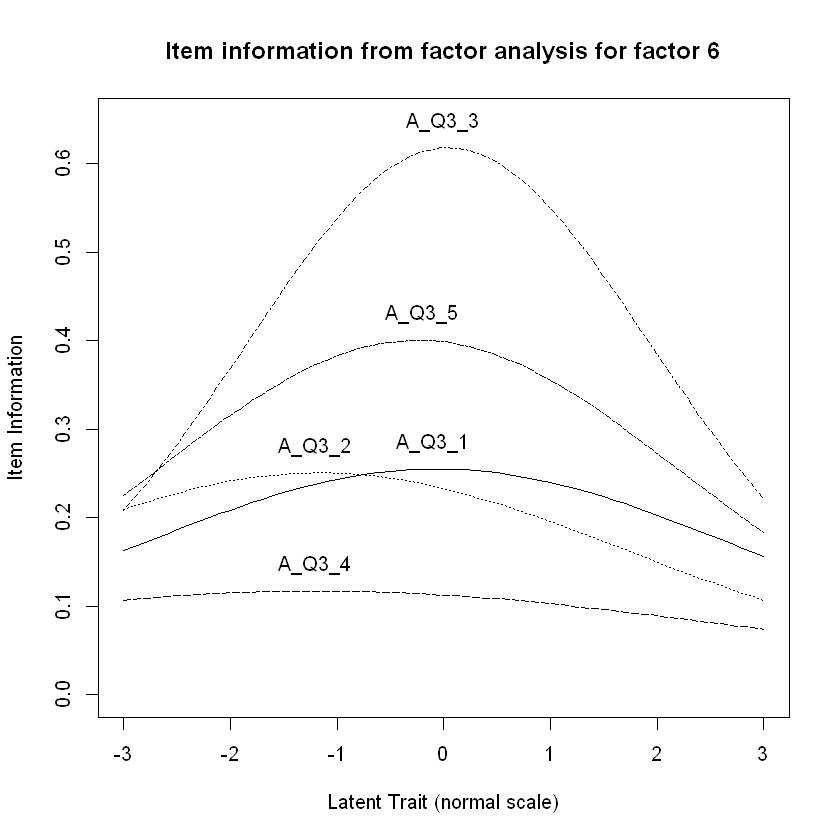

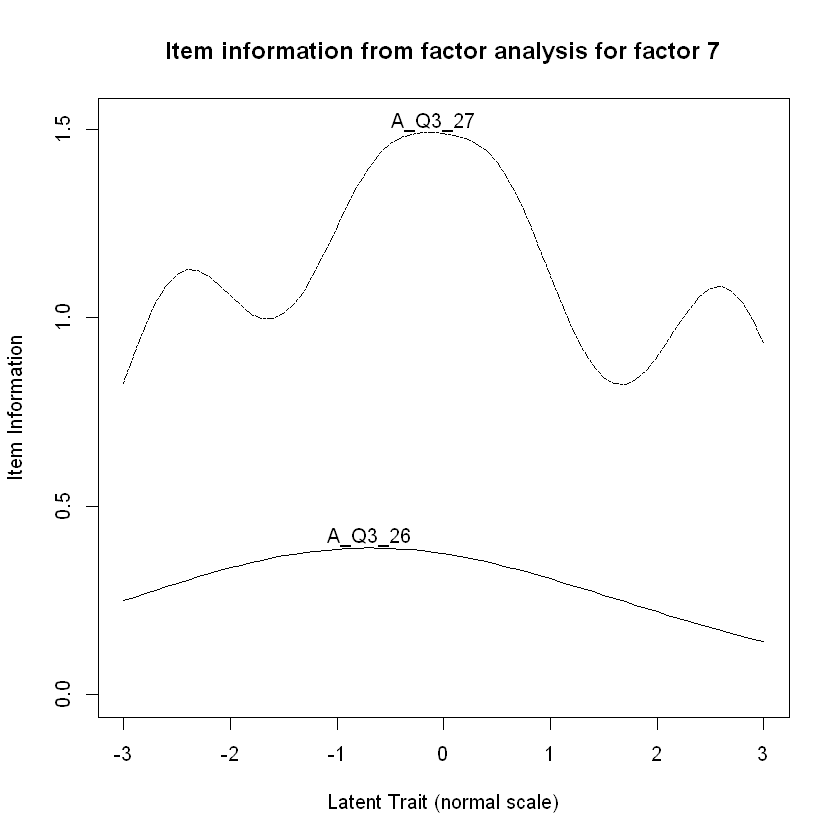

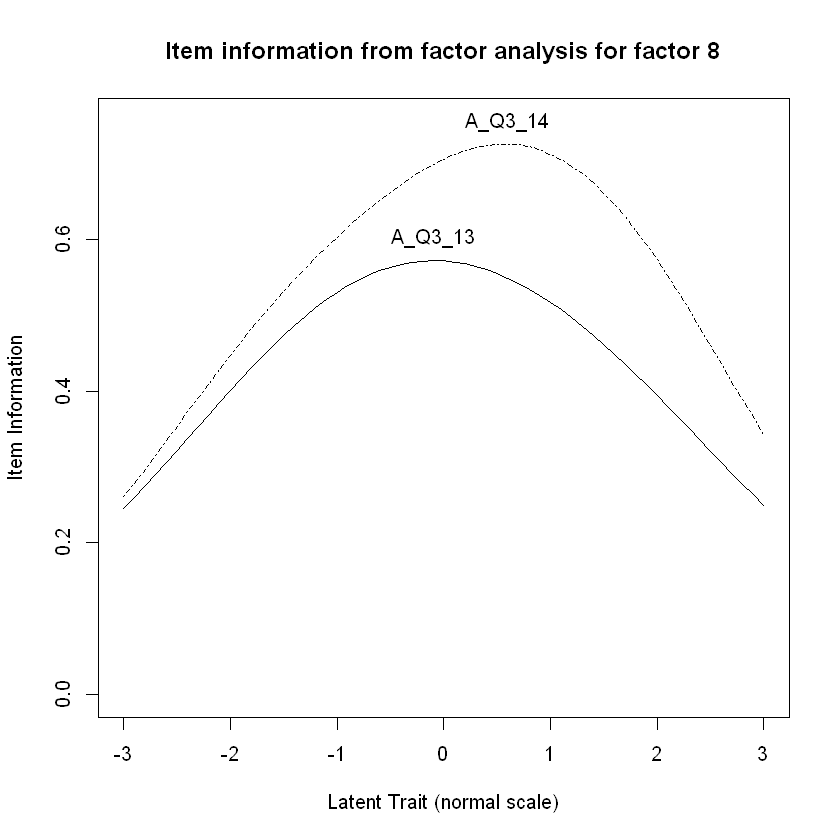

In [78]:
plot(IRT_AQ3)

In [79]:
library("ltm")

In [80]:
matrix_AQ3 <- convert_data(MyData,vec_AQ3)

In [81]:
get_fitems <- function(F,f,thr){
    names(F$loadings[F$loadings[,f] > thr, f])
}

In [82]:
get_datagrm <- function(df,F,f,thr,type='factor'){
    if (type == 'factor'){
        DF <- data.frame(apply(df[get_fitems(F,f,thr)],2,as.factor))
    }else {
        DF <- data.frame(apply(df[get_fitems(F,f,thr)],2,as.numeric))
    }
    DF
}

### GRM-Funktion

In [83]:
grm_full <- function (df,F,f,thr){
    results <- list()
    results$rcor <- rcor.test(get_datagrm(df,F,f,thr), method = "kendall")
    results$fit1 <- grm(get_datagrm(df,F,f,thr), constrained = TRUE)
    results$fit2 <- grm(get_datagrm(df,F,f,thr), constrained = FALSE)
    results$anova <- anova(results$fit1,results$fit2)
    results$margins1 <- margins(results$fit1)
    results$margins2 <- margins(results$fit2)
    results$info1 <- information(results$fit1, c(-4, 4))
    results$info2 <- information(results$fit2, c(-4, 4))
    results$alpha <- alpha(get_datagrm(df,F,f,thr,type='num'))
    results
}

#### GRM MR1

In [84]:
GRM_AQ3_MR1 <- grm_full(MyData,FA_AQ3,'MR1',0.3)

In [85]:
GRM_AQ3_MR1$alpha


Reliability analysis   
Call: alpha(x = get_datagrm(df, F, f, thr, type = "num"))

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd
      0.85      0.85    0.86      0.41 5.6 0.027  3.6 0.73

 lower alpha upper     95% confidence boundaries
0.8 0.85 0.9 

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r S/N alpha se
A_Q3_4       0.84      0.84    0.84      0.43 5.2    0.028
A_Q3_16      0.86      0.86    0.86      0.46 5.9    0.026
A_Q3_18      0.82      0.82    0.82      0.39 4.5    0.032
A_Q3_19      0.82      0.81    0.82      0.38 4.4    0.033
A_Q3_20      0.82      0.82    0.82      0.39 4.5    0.032
A_Q3_21      0.84      0.84    0.84      0.43 5.3    0.029
A_Q3_22      0.83      0.83    0.82      0.40 4.7    0.031
A_Q3_25      0.83      0.83    0.83      0.41 4.9    0.030

 Item statistics 
         n raw.r std.r r.cor r.drop mean   sd
A_Q3_4  67  0.63  0.64  0.55   0.51  4.2 0.96
A_Q3_16 67  0.52  0.52  0.41   0.38  3.9 0.99
A_Q3_18 

In [86]:
GRM_AQ3_MR1$rcor


        A_Q3_4 A_Q3_16 A_Q3_18 A_Q3_19 A_Q3_20 A_Q3_21 A_Q3_22 A_Q3_25
A_Q3_4   *****  0.288   0.356   0.361   0.380   0.230   0.250   0.325 
A_Q3_16  0.007  *****   0.206   0.302   0.297   0.047   0.154   0.205 
A_Q3_18  0.001  0.045   *****   0.508   0.492   0.389   0.553   0.317 
A_Q3_19  0.001  0.004  <0.001   *****   0.547   0.414   0.446   0.464 
A_Q3_20 <0.001  0.004  <0.001  <0.001   *****   0.442   0.397   0.325 
A_Q3_21  0.038  0.669  <0.001  <0.001  <0.001   *****   0.293   0.317 
A_Q3_22  0.019  0.142  <0.001  <0.001  <0.001   0.007   *****   0.504 
A_Q3_25  0.002  0.049   0.002  <0.001   0.001   0.003  <0.001   ***** 

upper diagonal part contains correlation coefficient estimates 
lower diagonal part contains corresponding p-values


Korrelation (non parametric) -> oben rechts; unten links p-values (non parametric correlations sinnvoller für ordinale/graduale Werte)

In [87]:
GRM_AQ3_MR1$anova


 Likelihood Ratio Table
                 AIC     BIC log.Lik   LRT df p.value
results$fit1 1343.82 1414.37 -639.91                 
results$fit2 1341.49 1427.47 -631.75 16.33  7   0.022



Vergleich von Model1 und 2 (fit1, fit2): mit constrained true/false ->

constrained = assumes equal discrimination parameters across items ("items werden als unabhängig untereinander betrachtet" +/- Erklärung, aber nicht wiss so zu formulieren)

Model2 passt besser (p.value unter 0.05), daher wird im Weiteren damit gearbeitet (! nahe am P-Valor-Grenzwert)

wenn p.value über 0.05, sollten beide Modelle getestet werden

#### Grafiken zur Visualisierung

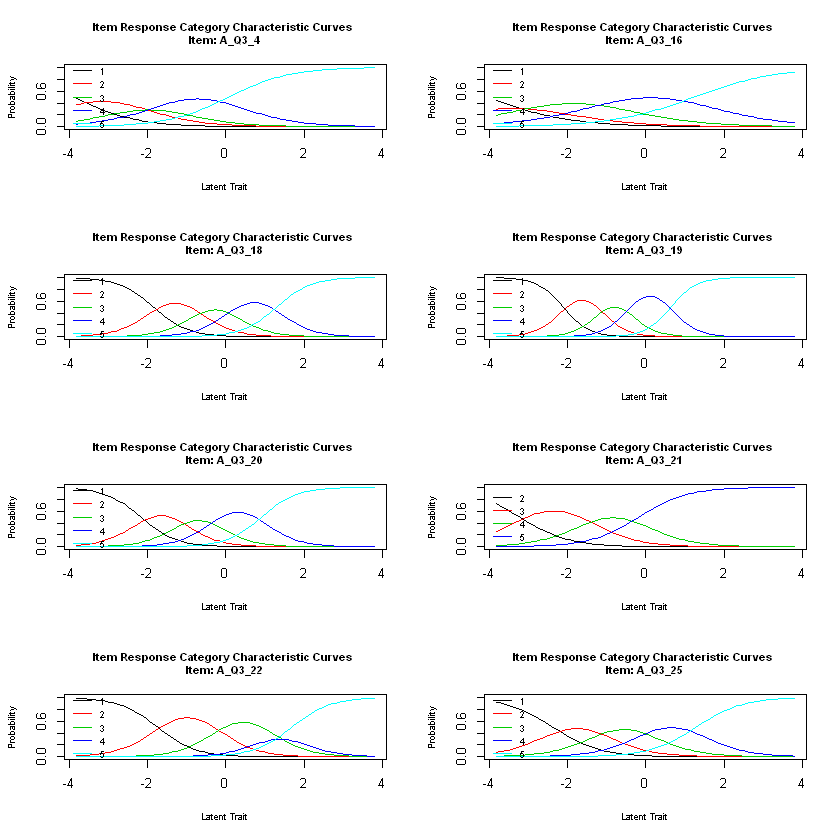

In [88]:
par(mfrow = c(4, 2))
plot(GRM_AQ3_MR1$fit2, lwd = 1, cex = 0.7, legend = TRUE, cx = "left",xlab = "Latent Trait", cex.main = 0.8, cex.lab = 0.7, cex.axis = 1)

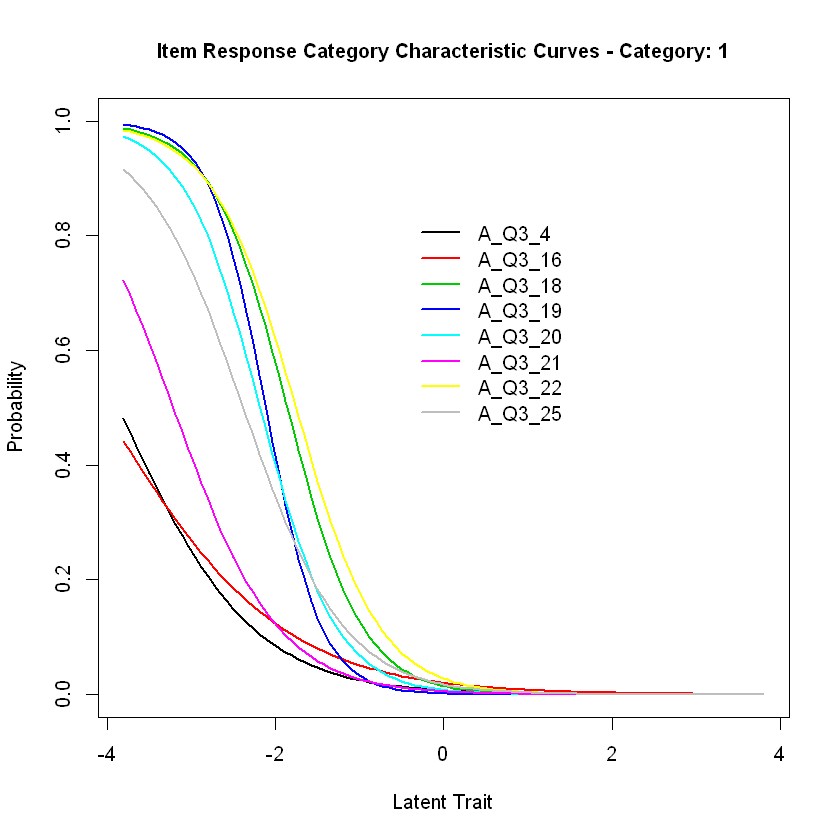

In [89]:
plot(GRM_AQ3_MR1$fit2, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

In [90]:
GRM_AQ3_MR1$info2


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 43.01
Information in (-4, 4) = 41.25 (95.91%)
Based on all the items


In [91]:
information(GRM_AQ3_MR1$fit2, c(-4, 4), items = c(3:4))


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 16.44
Information in (-4, 4) = 16.41 (99.8%)
Based on items 3, 4


In [92]:
16.41/43.01

[1] 0.3815392

In [93]:
information(GRM_AQ3_MR1$fit2, c(-4, 4), items = c(1:2))


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 5.63
Information in (-4, 4) = 4.47 (79.28%)
Based on items 1, 2


In [94]:
5.63/43.01

[1] 0.1308998

Items A_Q3_4 und A_Q3_16 tragen nur wenig zum Informationsgehalt des Faktors bei.

#### GRM MR2

In [95]:
GRM_AQ3_MR2 <- grm_full(MyData,FA_AQ3,'MR2',0.6)

In [172]:
GRM_AQ3_MR2$alpha


Reliability analysis   
Call: alpha(x = get_datagrm(df, F, f, thr, type = "num"))

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd
      0.87      0.87    0.82      0.69 6.5 0.028    4 0.94

 lower alpha upper     95% confidence boundaries
0.81 0.87 0.92 

 Reliability if an item is dropped:
       raw_alpha std.alpha G6(smc) average_r S/N alpha se
A_Q3_7      0.85      0.85    0.75      0.75 5.9    0.036
A_Q3_8      0.80      0.80    0.67      0.67 4.1    0.048
A_Q3_9      0.78      0.78    0.64      0.64 3.5    0.054

 Item statistics 
        n raw.r std.r r.cor r.drop mean  sd
A_Q3_7 67  0.86  0.87  0.75   0.70  3.9 1.0
A_Q3_8 67  0.89  0.89  0.82   0.76  4.0 1.0
A_Q3_9 67  0.91  0.91  0.84   0.78  4.0 1.1

Non missing response frequency for each item
          1    2    3    4    5 miss
A_Q3_7 0.00 0.10 0.21 0.33 0.36    0
A_Q3_8 0.01 0.07 0.22 0.27 0.42    0
A_Q3_9 0.04 0.07 0.15 0.33 0.40    0

In [96]:
GRM_AQ3_MR2$anova


 Likelihood Ratio Table
                AIC    BIC log.Lik  LRT df p.value
results$fit1 459.71 486.17 -217.86                
results$fit2 461.78 492.64 -216.89 1.94  2   0.379



Folgende Grafik zeigt bei Anwendung beider Modelle klares Bild -> klare Struktur

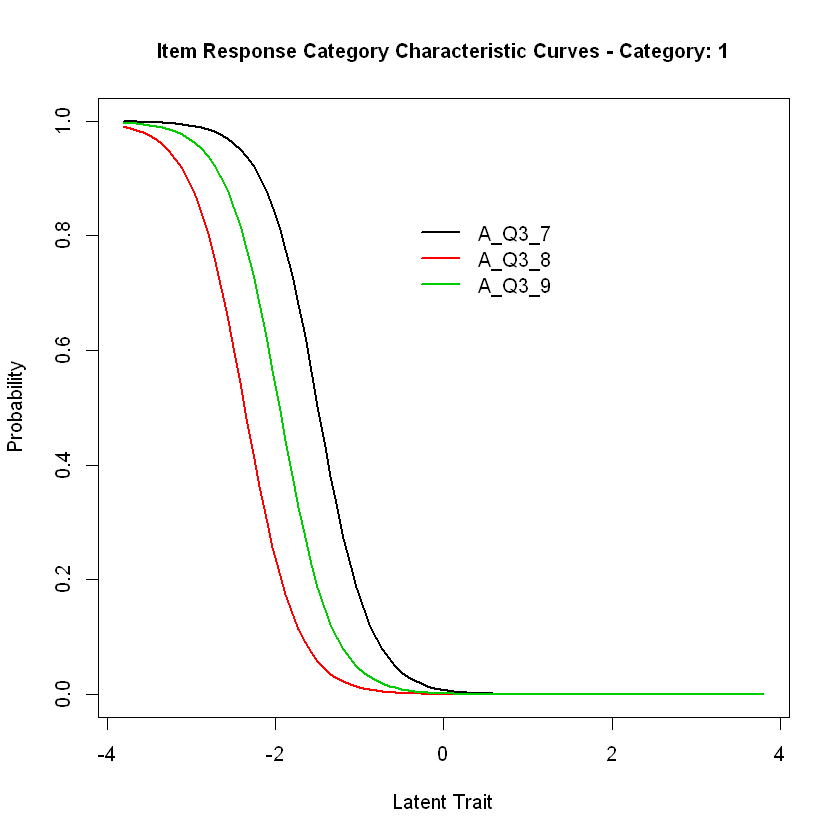

In [97]:
plot(GRM_AQ3_MR2$fit1, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

#### GRM MR3

In [98]:
GRM_AQ3_MR3 <- grm_full(MyData,FA_AQ3,'MR3',0.3)

In [173]:
GRM_AQ3_MR3$alpha


Reliability analysis   
Call: alpha(x = get_datagrm(df, F, f, thr, type = "num"))

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd
      0.76      0.76    0.74      0.39 3.1 0.046  3.4 0.79

 lower alpha upper     95% confidence boundaries
0.67 0.76 0.85 

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r S/N alpha se
A_Q3_1       0.74      0.74    0.71      0.42 2.9    0.051
A_Q3_10      0.74      0.74    0.70      0.41 2.8    0.053
A_Q3_11      0.68      0.68    0.63      0.34 2.1    0.063
A_Q3_12      0.65      0.66    0.61      0.33 1.9    0.069
A_Q3_13      0.75      0.75    0.71      0.43 3.0    0.048

 Item statistics 
         n raw.r std.r r.cor r.drop mean   sd
A_Q3_1  67  0.67  0.66  0.51   0.45  3.1 1.14
A_Q3_10 67  0.64  0.67  0.54   0.47  4.3 0.89
A_Q3_11 67  0.79  0.78  0.74   0.62  3.4 1.15
A_Q3_12 67  0.82  0.81  0.78   0.68  3.3 1.16
A_Q3_13 67  0.65  0.63  0.49   0.42  3.0 1.16

Non missing response frequency for each item

In [99]:
GRM_AQ3_MR3$anova


 Likelihood Ratio Table
                AIC    BIC log.Lik   LRT df p.value
results$fit1 927.84 971.93 -443.92                 
results$fit2 923.60 976.51 -437.80 12.24  4   0.016



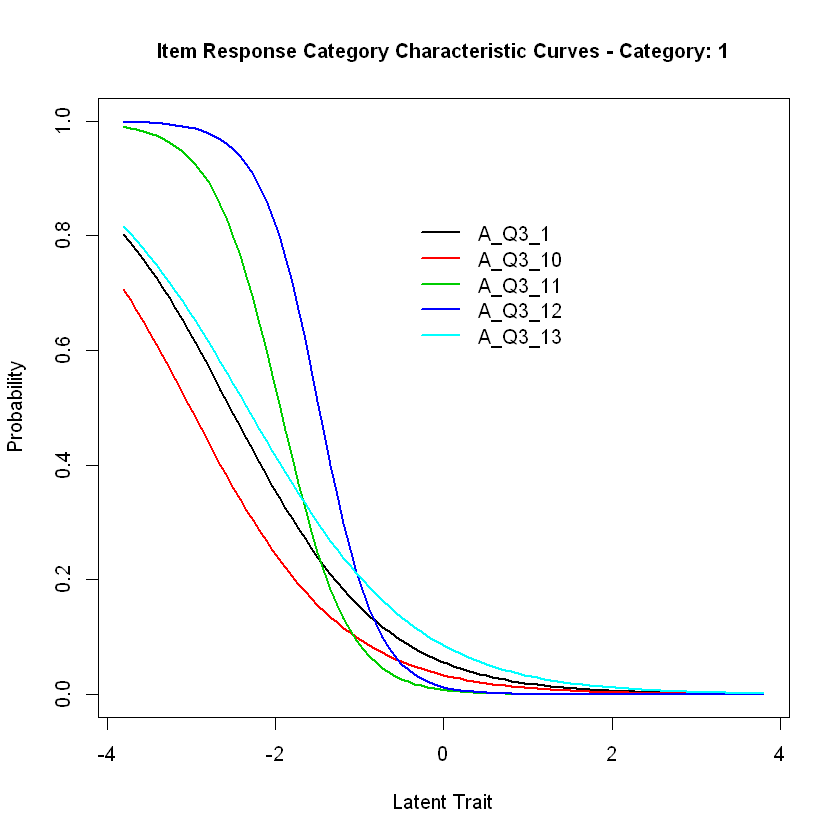

In [100]:
plot(GRM_AQ3_MR3$fit2, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

In [101]:
GRM_AQ3_MR3$info2


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 24.45
Information in (-4, 4) = 23.48 (96.03%)
Based on all the items


In [102]:
information(GRM_AQ3_MR3$fit2, c(-4, 4), items = c(1:2,5))


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 7.63
Information in (-4, 4) = 6.68 (87.53%)
Based on items 1, 2, 5


In [175]:
information(GRM_AQ3_MR3$fit2, c(-4, 4), items = 2)


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 2.21
Information in (-4, 4) = 1.92 (86.88%)
Based on items 2


In [176]:
2.21/24.45

[1] 0.09038855

A_Q3_1, A_Q3_10 und A_Q3_13 tragen 31% gesamt, einzeln jeweils ca. 10% zum Informationsgehalt bei.

#### GRM MR4

In [104]:
GRM_AQ3_MR4 <- grm_full(MyData,FA_AQ3,'MR4',0.3)

Faktorenanalyse schlägt 2 Items für diesen Faktor vor: A_Q3_26 und A_Q3_27; GRM wurde mit Grenzwert 0,3 durchgeführt, da 2 Items zu wenige für diese Art der Analyse sind -> 2 unpassende Items können unberücksichtigt bleiben. 

Analoges Vorgehen bei MR5!

In [174]:
GRM_AQ3_MR4$alpha


Reliability analysis   
Call: alpha(x = get_datagrm(df, F, f, thr, type = "num"))

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean  sd
      0.68      0.69    0.66      0.35 2.2 0.062  3.7 0.8

 lower alpha upper     95% confidence boundaries
0.56 0.68 0.8 

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r S/N alpha se
A_Q3_2       0.66      0.65    0.59      0.38 1.9    0.070
A_Q3_4       0.61      0.61    0.53      0.34 1.5    0.078
A_Q3_26      0.55      0.57    0.49      0.31 1.3    0.097
A_Q3_27      0.64      0.65    0.57      0.39 1.9    0.076

 Item statistics 
         n raw.r std.r r.cor r.drop mean   sd
A_Q3_2  66  0.64  0.69  0.52   0.40  4.1 0.94
A_Q3_4  67  0.69  0.73  0.61   0.48  4.2 0.96
A_Q3_26 67  0.80  0.77  0.67   0.56  3.7 1.26
A_Q3_27 67  0.73  0.68  0.53   0.44  3.0 1.26

Non missing response frequency for each item
           1    2    3    4    5 miss
A_Q3_2  0.02 0.06 0.14 0.42 0.36 0.01
A_Q3_4  0.01 0.06 0.10 0.34 0.4

In [105]:
GRM_AQ3_MR4$anova


 Likelihood Ratio Table
                AIC    BIC log.Lik LRT df p.value
results$fit1 717.71 755.19 -341.85               
results$fit2 722.31 766.41 -341.16 1.4  3   0.707



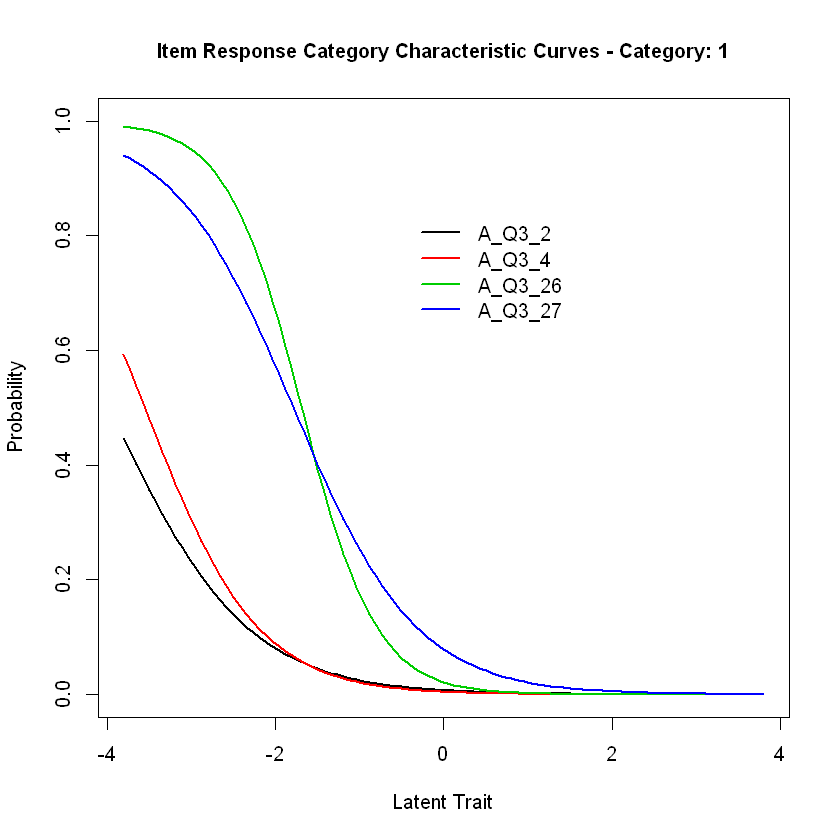

In [106]:
plot(GRM_AQ3_MR4$fit2, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

In [107]:
GRM_AQ3_MR4$info2


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 16.39
Information in (-4, 4) = 15.09 (92.09%)
Based on all the items


In [108]:
information(GRM_AQ3_MR4$fit2, c(-4, 4), items = 4)


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 3.47
Information in (-4, 4) = 3.34 (96.16%)
Based on items 4


In [109]:
3.27/16.39

[1] 0.1995119

#### GRM MR5

In [110]:
GRM_AQ3_MR5 <- grm_full(MyData,FA_AQ3,'MR5',0.3)

In [177]:
GRM_AQ3_MR5$alpha


Reliability analysis   
Call: alpha(x = get_datagrm(df, F, f, thr, type = "num"))

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean  sd
       0.7      0.71    0.69      0.38 2.5 0.062  3.2 0.9

 lower alpha upper     95% confidence boundaries
0.57 0.7 0.82 

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r S/N alpha se
A_Q3_3       0.76      0.76    0.71      0.51 3.1    0.050
A_Q3_22      0.67      0.69    0.66      0.43 2.2    0.074
A_Q3_23      0.53      0.55    0.46      0.29 1.2    0.099
A_Q3_24      0.54      0.56    0.47      0.29 1.2    0.098

 Item statistics 
         n raw.r std.r r.cor r.drop mean  sd
A_Q3_3  65  0.65  0.60  0.35   0.30  3.0 1.5
A_Q3_22 67  0.65  0.68  0.49   0.41  2.7 1.1
A_Q3_23 67  0.82  0.83  0.80   0.63  3.6 1.2
A_Q3_24 67  0.81  0.82  0.79   0.63  3.6 1.2

Non missing response frequency for each item
           1    2    3    4    5 miss
A_Q3_3  0.23 0.18 0.18 0.20 0.20 0.03
A_Q3_22 0.09 0.37 0.34 0.09 0.10 0.0

In [111]:
GRM_AQ3_MR5$anova


 Likelihood Ratio Table
                AIC    BIC log.Lik   LRT df p.value
results$fit1 781.54 819.02 -373.77                 
results$fit2 760.51 804.60 -360.25 27.03  3  <0.001



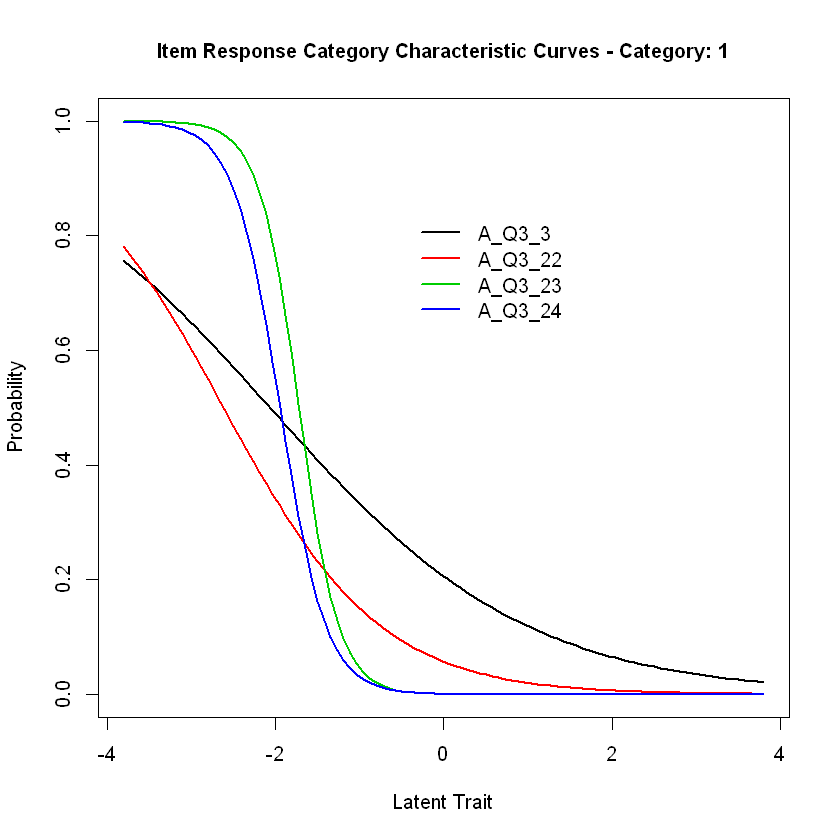

In [112]:
plot(GRM_AQ3_MR5$fit2, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

#### GRM MR6

In [113]:
GRM_AQ3_MR6 <- grm_full(MyData,FA_AQ3,'MR6',0.3)

In [178]:
GRM_AQ3_MR6$alpha


Reliability analysis   
Call: alpha(x = get_datagrm(df, F, f, thr, type = "num"))

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd
      0.71      0.71    0.67      0.38 2.5 0.056  3.4 0.74

 lower alpha upper     95% confidence boundaries
0.6 0.71 0.82 

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r S/N alpha se
A_Q3_13      0.61      0.63    0.53      0.36 1.7    0.081
A_Q3_14      0.60      0.62    0.52      0.35 1.6    0.084
A_Q3_17      0.67      0.67    0.60      0.40 2.0    0.063
A_Q3_21      0.69      0.68    0.61      0.42 2.2    0.064

 Item statistics 
         n raw.r std.r r.cor r.drop mean   sd
A_Q3_13 67  0.80  0.76  0.66   0.56  3.0 1.16
A_Q3_14 67  0.80  0.76  0.67   0.57  2.8 1.12
A_Q3_17 67  0.69  0.71  0.55   0.45  3.6 0.96
A_Q3_21 67  0.63  0.69  0.52   0.43  4.4 0.78

Non missing response frequency for each item
           1    2    3    4    5 miss
A_Q3_13 0.12 0.21 0.30 0.28 0.09    0
A_Q3_14 0.10 0.34 0.30 0.16 0

In [114]:
GRM_AQ3_MR6$anova


 Likelihood Ratio Table
                AIC    BIC log.Lik  LRT df p.value
results$fit1 698.62 733.90 -333.31                
results$fit2 701.14 743.03 -331.57 3.48  3   0.323



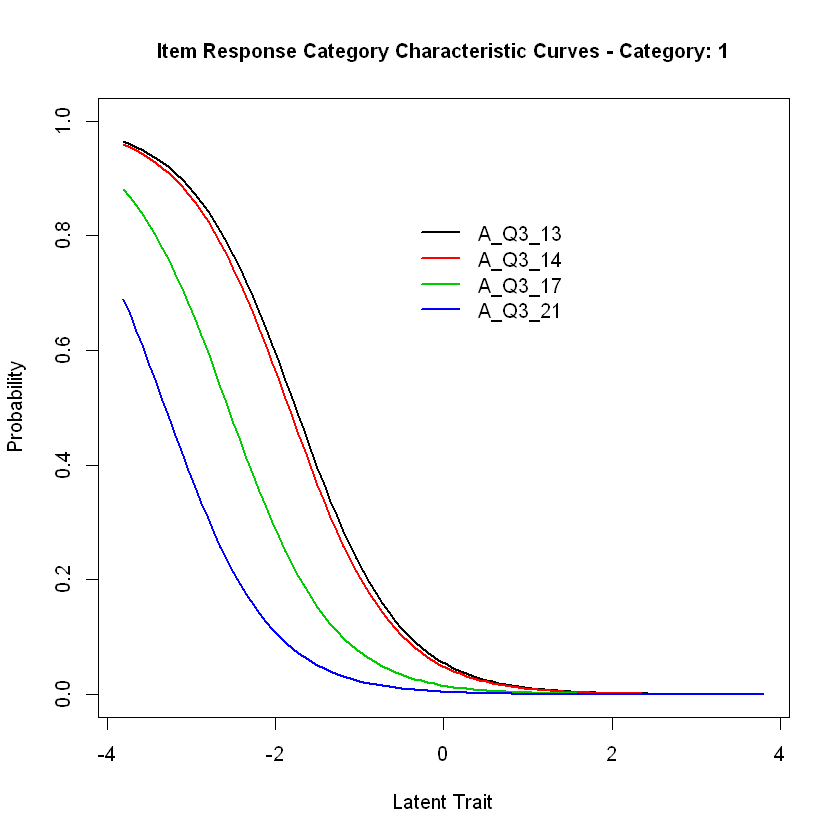

In [115]:
plot(GRM_AQ3_MR6$fit1, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

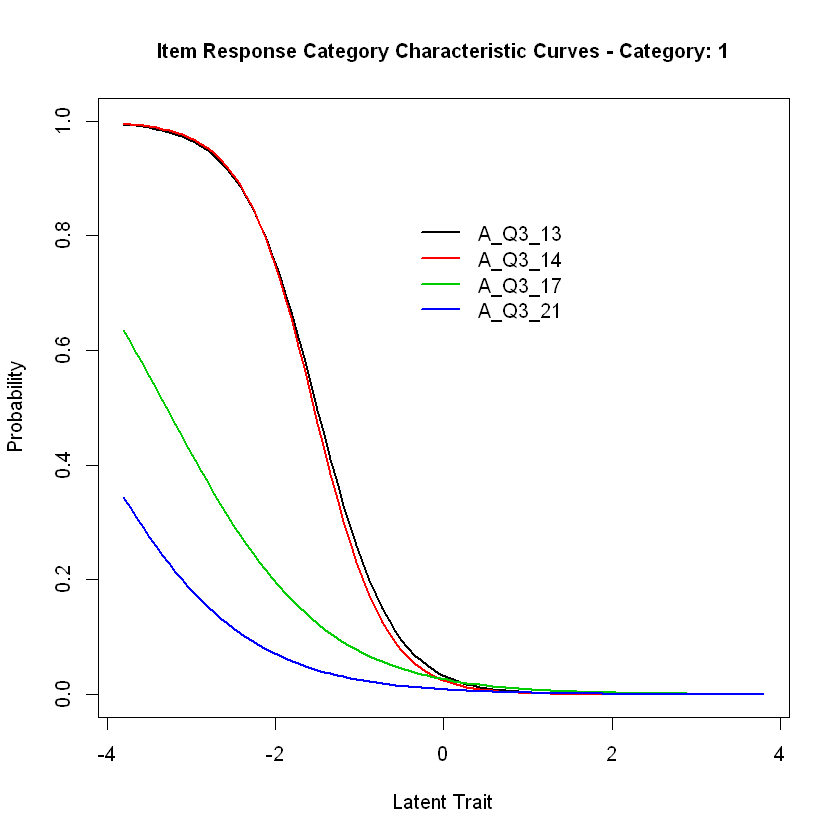

In [116]:
plot(GRM_AQ3_MR6$fit2, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

In [117]:
GRM_AQ3_MR6$info1


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = TRUE)

Total Information = 17.42
Information in (-4, 4) = 16.63 (95.49%)
Based on all the items


In [118]:
information(GRM_AQ3_MR6$fit1, c(-4, 4), items = 4)


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = TRUE)

Total Information = 3.88
Information in (-4, 4) = 3.48 (89.71%)
Based on items 4


In [119]:
3.88/17.42

[1] 0.2227325

In [120]:
GRM_AQ3_MR6$info2


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 19.37
Information in (-4, 4) = 18.2 (93.92%)
Based on all the items


In [121]:
information(GRM_AQ3_MR6$fit2, c(-4, 4), items = 4)


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 2.45
Information in (-4, 4) = 1.77 (72.43%)
Based on items 4


In [122]:
2.45/19.37

[1] 0.1264843

Items A_Q3_17 und A_Q3_21 tragen relativ gesehen weniger zum Informationsgehalt des Faktors bei, allerdings doch so viel, dass sie nicht eindeutig eliminiert werden können. Inhaltlich gesehen erscheint es logisch, dass Item 17 (logische Zusammenhänge suchen) und Item 21 (Weltwissen etc) einen Zusammenhang mit semantischen Verbindungen aufweisen, diese Bindung aber schwächer im Vergleich zu den eindeutigen Items des Faktors ist. 

#### GRM MR7

In [123]:
GRM_AQ3_MR7 <- grm_full(MyData,FA_AQ3,'MR7',0.3)

In [179]:
GRM_AQ3_MR7$alpha


Reliability analysis   
Call: alpha(x = get_datagrm(df, F, f, thr, type = "num"))

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd
      0.66      0.68    0.66       0.3 2.1 0.066  3.3 0.78

 lower alpha upper     95% confidence boundaries
0.53 0.66 0.79 

 Reliability if an item is dropped:
       raw_alpha std.alpha G6(smc) average_r S/N alpha se
A_Q3_1      0.60      0.63    0.58      0.29 1.7    0.081
A_Q3_2      0.57      0.57    0.53      0.25 1.3    0.086
A_Q3_3      0.65      0.66    0.62      0.33 2.0    0.071
A_Q3_5      0.58      0.61    0.56      0.28 1.5    0.085
A_Q3_6      0.66      0.68    0.64      0.34 2.1    0.069

 Item statistics 
        n raw.r std.r r.cor r.drop mean   sd
A_Q3_1 67  0.66  0.67  0.56   0.44  3.1 1.14
A_Q3_2 66  0.70  0.75  0.69   0.55  4.1 0.94
A_Q3_3 65  0.65  0.61  0.45   0.36  3.0 1.46
A_Q3_5 67  0.70  0.70  0.60   0.48  3.2 1.18
A_Q3_6 67  0.59  0.59  0.40   0.32  3.0 1.27

Non missing response frequency for each item
          1

In [124]:
GRM_AQ3_MR7$anova


 Likelihood Ratio Table
                AIC     BIC log.Lik  LRT df p.value
results$fit1 984.68 1030.98 -471.34                
results$fit2 984.22 1039.34 -467.11 8.46  4   0.076



In [125]:
GRM_AQ3_MR7$rcor


       A_Q3_1 A_Q3_2 A_Q3_3 A_Q3_5 A_Q3_6
A_Q3_1  *****     NA     NA  0.160  0.194
A_Q3_2 <0.001  *****     NA     NA     NA
A_Q3_3  0.003  0.037  *****     NA     NA
A_Q3_5  0.113 <0.001  0.011  *****  0.274
A_Q3_6  0.053  0.008  0.480  0.006  *****

upper diagonal part contains correlation coefficient estimates 
lower diagonal part contains corresponding p-values


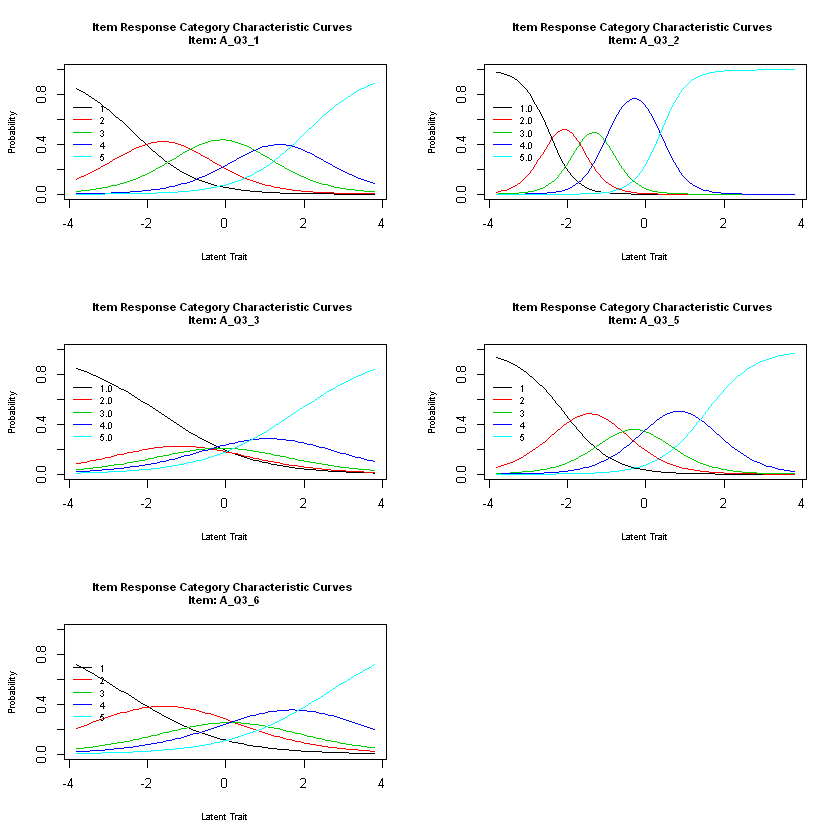

In [126]:
par(mfrow = c(3, 2))
plot(GRM_AQ3_MR7$fit2, lwd = 1, cex = 0.7, legend = TRUE, cx = "left",xlab = "Latent Trait", cex.main = 0.8, cex.lab = 0.7, cex.axis = 1)

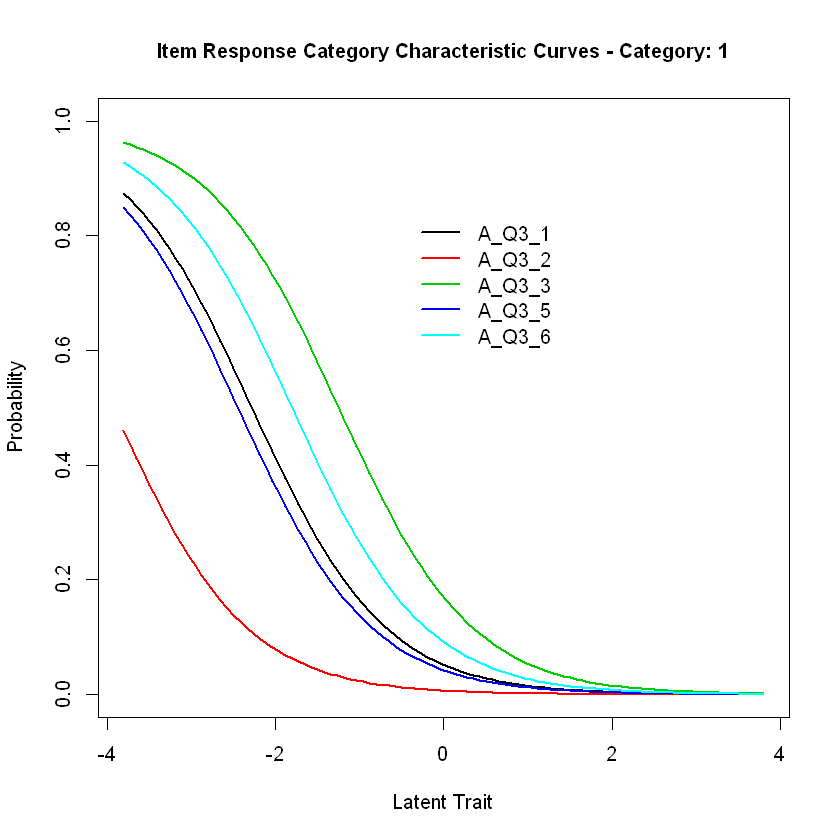

In [127]:
plot(GRM_AQ3_MR7$fit1, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

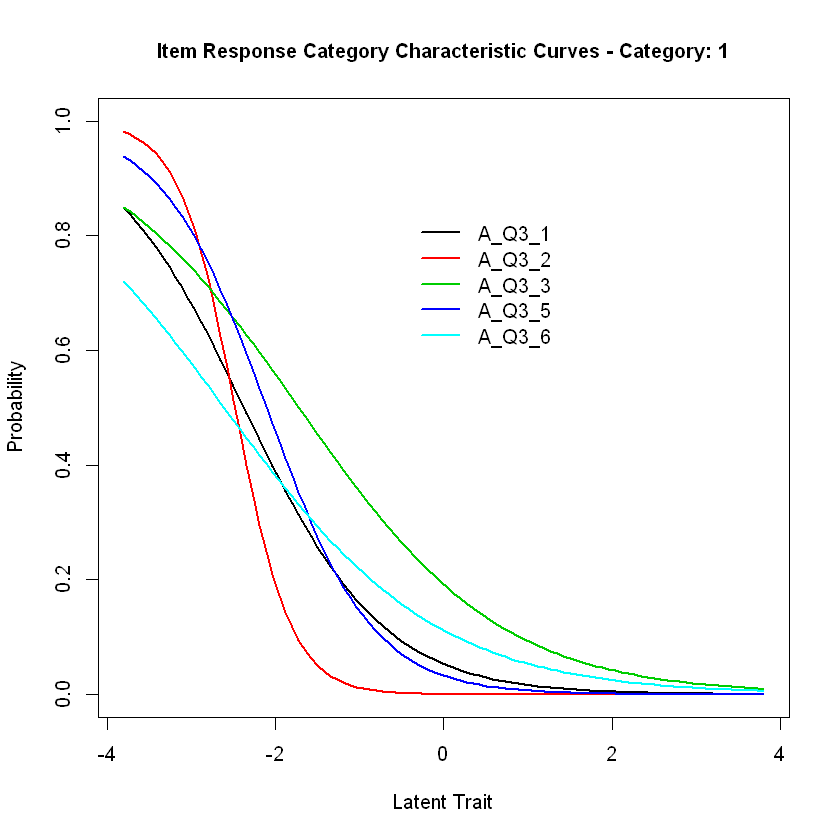

In [128]:
plot(GRM_AQ3_MR7$fit2, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

In [129]:
GRM_AQ3_MR7$info1


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = TRUE)

Total Information = 15.83
Information in (-4, 4) = 14.52 (91.73%)
Based on all the items


In [130]:
information(GRM_AQ3_MR7$fit1, c(-4, 4), items = 2)


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = TRUE)

Total Information = 3.42
Information in (-4, 4) = 2.79 (81.41%)
Based on items 2


In [131]:
3.42/15.83

[1] 0.2160455

In [132]:
GRM_AQ3_MR7$info2


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 20.53
Information in (-4, 4) = 19.53 (95.12%)
Based on all the items


In [133]:
information(GRM_AQ3_MR7$fit2, c(-4, 4), items = 2)


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 9.54
Information in (-4, 4) = 9.51 (99.68%)
Based on items 2


In [134]:
9.54/20.53

[1] 0.4646858

#### GRM MR8

In [135]:
GRM_AQ3_MR8 <- grm_full(MyData,FA_AQ3,'MR8',0.39)

In [180]:
GRM_AQ3_MR8$alpha


Reliability analysis   
Call: alpha(x = get_datagrm(df, F, f, thr, type = "num"))

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd
       0.8       0.8    0.81      0.34 4.1 0.036  3.8 0.68

 lower alpha upper     95% confidence boundaries
0.73 0.8 0.87 

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r S/N alpha se
A_Q3_30      0.78      0.78    0.78      0.33 3.5    0.041
A_Q3_31      0.80      0.80    0.80      0.37 4.0    0.036
A_Q3_15      0.79      0.78    0.79      0.34 3.7    0.039
A_Q3_19      0.78      0.78    0.78      0.33 3.5    0.041
A_Q3_32      0.80      0.80    0.80      0.36 4.0    0.037
A_Q3_33      0.77      0.77    0.77      0.32 3.4    0.043
A_Q3_28      0.75      0.76    0.75      0.31 3.1    0.046
A_Q3_29      0.78      0.78    0.77      0.33 3.5    0.042

 Item statistics 
         n raw.r std.r r.cor r.drop mean   sd
A_Q3_30 67  0.65  0.67  0.61   0.54  4.0 0.94
A_Q3_31 67  0.52  0.53  0.43   0.36  3.9 1.02
A_Q3_15

In [136]:
GRM_AQ3_MR8$anova


 Likelihood Ratio Table
                 AIC     BIC log.Lik   LRT df p.value
results$fit1 1396.48 1467.03 -666.24                 
results$fit2 1399.15 1485.14 -660.58 11.33  7   0.125



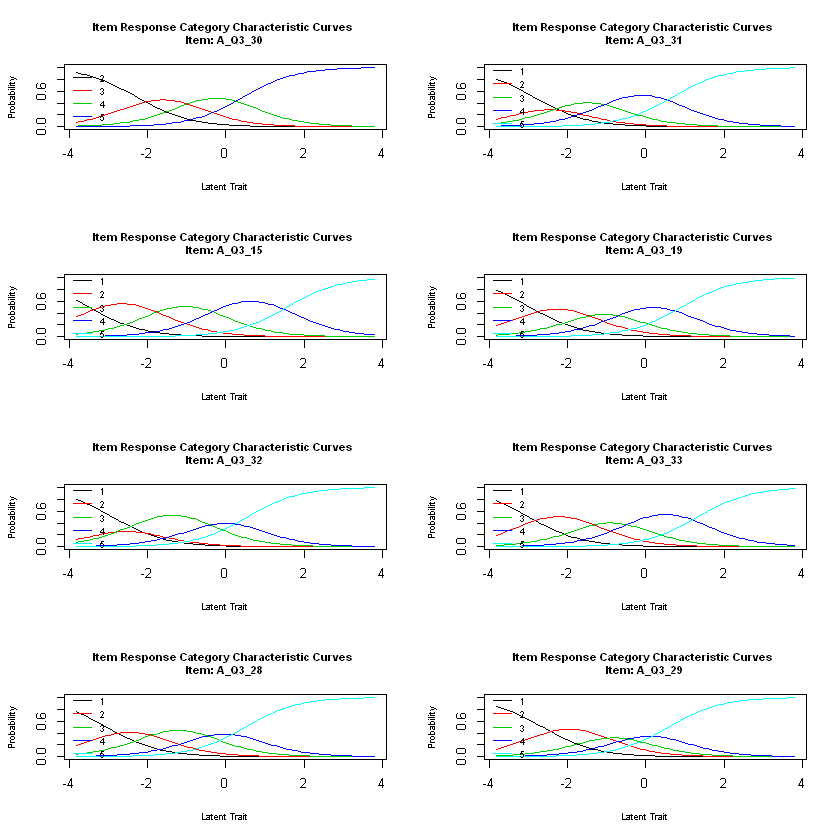

In [137]:
par(mfrow = c(4, 2))
plot(GRM_AQ3_MR8$fit1, lwd = 1, cex = 0.7, legend = TRUE, cx = "left",xlab = "Latent Trait", cex.main = 0.8, cex.lab = 0.7, cex.axis = 1)

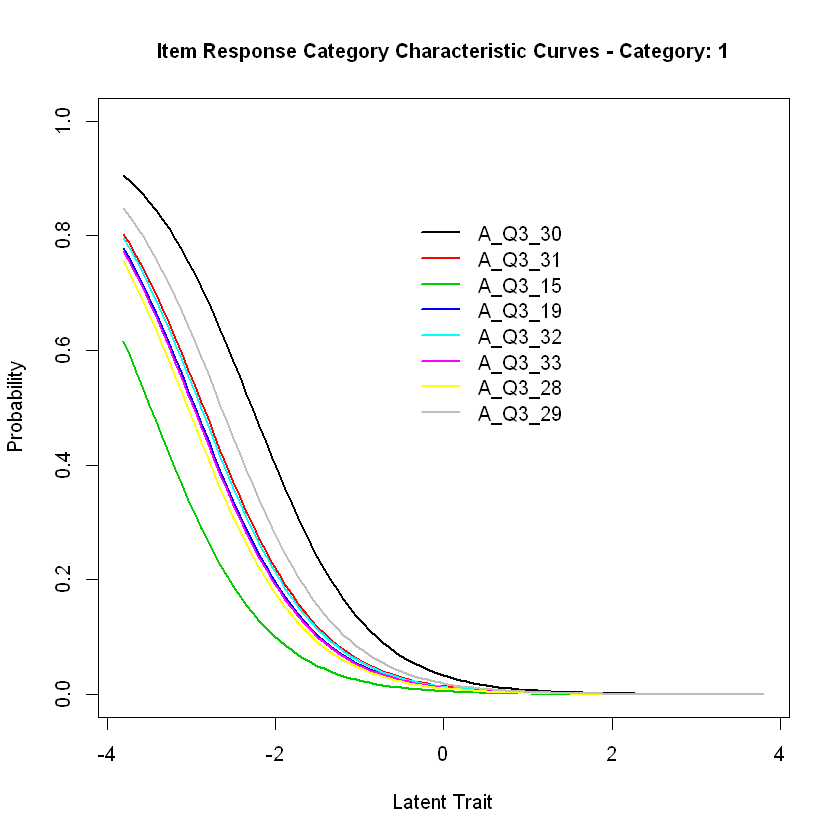

In [138]:
plot(GRM_AQ3_MR8$fit1, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

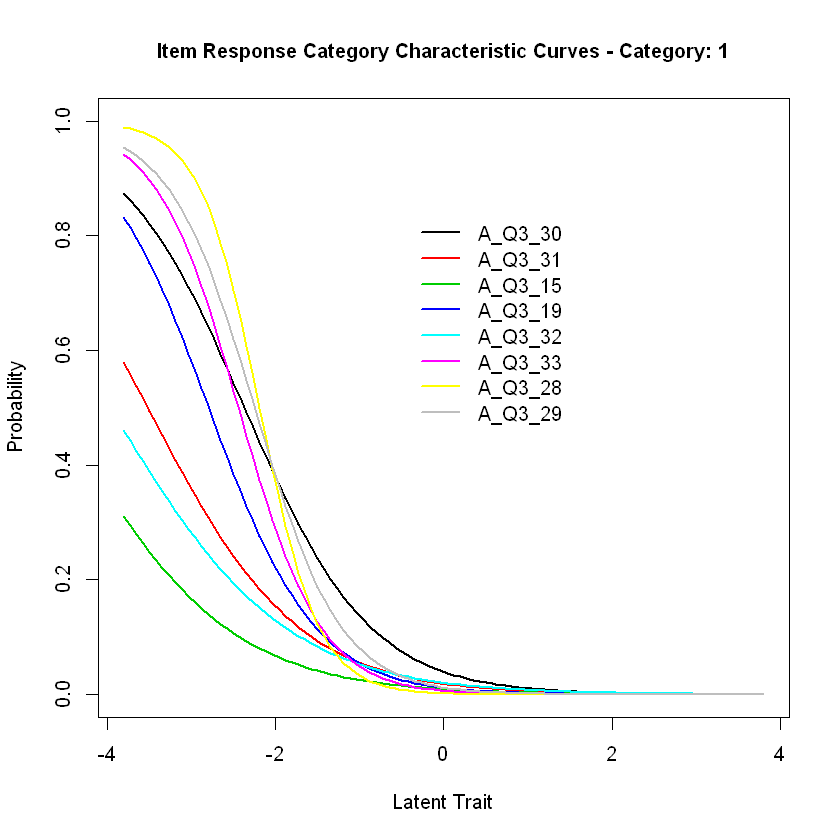

In [139]:
plot(GRM_AQ3_MR8$fit2, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

In [140]:
GRM_AQ3_MR8$info1


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = TRUE)

Total Information = 31.06
Information in (-4, 4) = 28.9 (93.05%)
Based on all the items


In [141]:
information(GRM_AQ3_MR8$fit1, c(-4, 4), items = 3)


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = TRUE)

Total Information = 4.56
Information in (-4, 4) = 4.05 (88.8%)
Based on items 3


In [142]:
information(GRM_AQ3_MR8$fit1, c(-4, 4), items = 4)


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = TRUE)

Total Information = 4.01
Information in (-4, 4) = 3.73 (93.16%)
Based on items 4


In [143]:
4.56/31.06

[1] 0.1468126

In [144]:
GRM_AQ3_MR8$info2


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 35.25
Information in (-4, 4) = 32.94 (93.46%)
Based on all the items


In [145]:
information(GRM_AQ3_MR8$fit2, c(-4, 4), items = 3)


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 2.97
Information in (-4, 4) = 2.17 (73.09%)
Based on items 3


In [146]:
information(GRM_AQ3_MR8$fit2, c(-4, 4), items = 4)


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 4.32
Information in (-4, 4) = 4.11 (95.03%)
Based on items 4


In [147]:
2.97/35.25

[1] 0.08425532

In [148]:
4.32/35.25

[1] 0.1225532

Items A_Q3_15 zeigt geringen Wert, trägt wenig zum Informationsgehalt des Faktors bei, ähnlich Item A_Q3_19. Beide haben auch inhaltlich wenig Übereinstimmung mit den anderen Items des Faktors (metakognitive Strategien).

### Konfirmatorische Faktorenanalyse

In [149]:
get_itemsCFA <- function(vd,vf){
    ind <- match(vd,vf)
    vf[-ind]
}  

In [150]:
items_CFA <- get_itemsCFA(c('A_Q3_4','A_Q3_15','A_Q3_16'),colnames(MyData)[vec_AQ3])

In [151]:
vec_AQ3cf <- match(items_CFA,colnames(MyData))

Parallel analysis suggests that the number of factors =  7  and the number of components =  4 


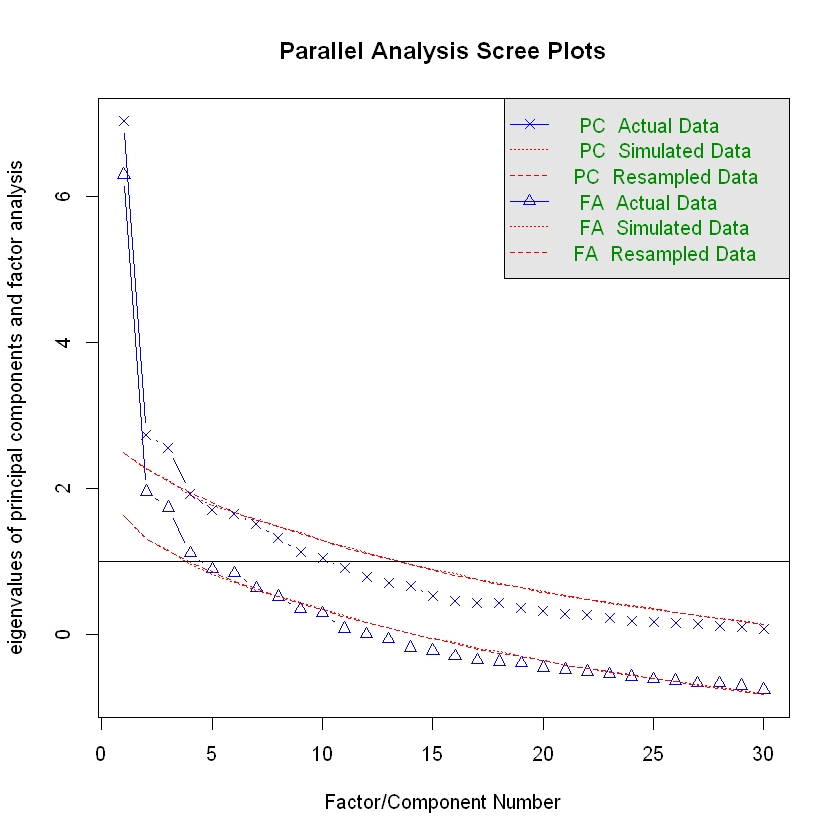

In [152]:
items.parallel1 <- fa.parallel(convert_data(MyData,vec_AQ3cf), fa="both")

In [153]:
FA_AQ3cf <- fa(convert_data(MyData,vec_AQ3cf), nfactors = 8, rotate = "varimax")

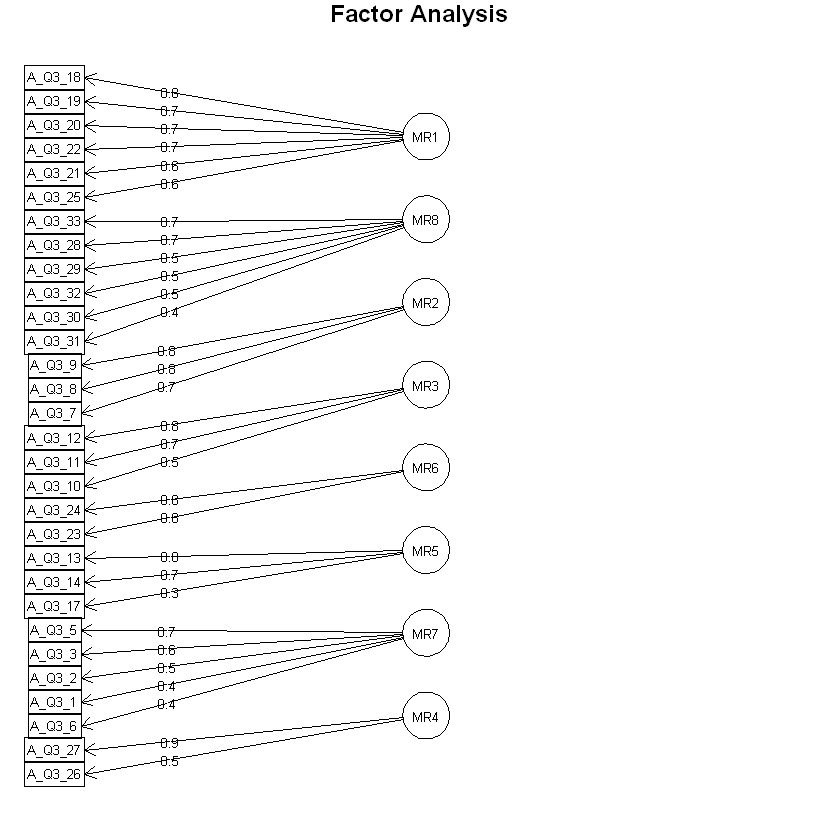

In [154]:
diagram(FA_AQ3cf)

In [155]:
FA_AQ3cf

Factor Analysis using method =  minres
Call: fa(r = convert_data(MyData, vec_AQ3cf), nfactors = 8, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
          MR1   MR8   MR2   MR3   MR6   MR5   MR7   MR4   h2    u2 com
A_Q3_1   0.26 -0.14  0.09  0.41  0.08  0.16  0.43  0.00 0.48 0.519 3.4
A_Q3_2   0.22  0.08  0.27  0.09  0.09 -0.03  0.53  0.23 0.48 0.518 2.6
A_Q3_3   0.08 -0.14  0.00 -0.17  0.34  0.20  0.58 -0.11 0.56 0.444 2.5
A_Q3_5   0.02  0.27 -0.03  0.01  0.05 -0.04  0.67  0.17 0.56 0.438 1.5
A_Q3_6   0.28  0.11  0.22  0.19 -0.30  0.07  0.37  0.16 0.44 0.563 5.0
A_Q3_7   0.01  0.11  0.75  0.18 -0.14  0.02  0.06  0.06 0.63 0.366 1.3
A_Q3_8   0.13  0.14  0.77  0.27  0.07  0.21  0.12 -0.10 0.78 0.221 1.7
A_Q3_9   0.10  0.22  0.83  0.13 -0.03  0.02  0.04  0.04 0.76 0.238 1.2
A_Q3_10  0.05 -0.05  0.33  0.51  0.14  0.01  0.10  0.07 0.41 0.595 2.1
A_Q3_30  0.22  0.47  0.23  0.13 -0.06  0.26  0.07  0.07 0.43 0.574 3.0
A_Q3_11  0.16  0.09  0.19  0.75

### GRM CQ1

In [156]:
GRM_CQ1 <- data.frame(apply(MyData[,vec_CQ1],2,as.factor))

In [157]:
alpha(data.frame(apply(MyData[,vec_CQ1],2,as.numeric)),check.keys=TRUE )

Warning message in alpha(data.frame(apply(MyData[, vec_CQ1], 2, as.numeric)), check.keys = TRUE):
"Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name."


Reliability analysis   
Call: alpha(x = data.frame(apply(MyData[, vec_CQ1], 2, as.numeric)), 
    check.keys = TRUE)

  raw_alpha std.alpha G6(smc) average_r S/N  ase mean   sd
      0.72      0.75     0.8      0.21   3 0.05  4.2 0.46

 lower alpha upper     95% confidence boundaries
0.63 0.72 0.82 

 Reliability if an item is dropped:
         raw_alpha std.alpha G6(smc) average_r S/N alpha se
C_Q1_1        0.70      0.73    0.77      0.22 2.8    0.054
C_Q1_2        0.71      0.74    0.77      0.22 2.9    0.052
C_Q1_3        0.71      0.73    0.78      0.22 2.8    0.054
C_Q1_4        0.71      0.74    0.77      0.22 2.8    0.053
C_Q1_5        0.68      0.71    0.76      0.20 2.5    0.057
C_Q1_6        0.69      0.72    0.76      0.20 2.5    0.056
C_Q1_7        0.70      0.73    0.77      0.21 2.7    0.055
C_Q1_8-       0.70      0.73    0.77      0.21 2.7    0.055
C_Q1_9        0.69      0.72    0.75      0.20 2.5    0.056
C_Q1_10-      0.75      0.77    0.81      0.25 3.3    0.044
C

In [158]:
rcor.test(GRM_CQ1, method = "kendall")


        C_Q1_1 C_Q1_2 C_Q1_3 C_Q1_4 C_Q1_5 C_Q1_6 C_Q1_7 C_Q1_8 C_Q1_9 C_Q1_10
C_Q1_1   *****  0.103  0.243  0.424  0.254  0.331  0.159 -0.167  0.085 -0.035 
C_Q1_2   0.357  ***** -0.024  0.267  0.110  0.093  0.158 -0.242  0.489 -0.305 
C_Q1_3   0.021  0.824  *****  0.196  0.317  0.358  0.254 -0.263  0.199 -0.005 
C_Q1_4  <0.001  0.019  0.068  *****  0.278  0.376  0.062  0.001  0.206 -0.104 
C_Q1_5   0.021  0.338  0.003  0.014  *****  0.478  0.350 -0.377  0.319 -0.166 
C_Q1_6   0.003  0.426  0.001  0.001 <0.001  *****  0.317 -0.197  0.363  0.003 
C_Q1_7   0.141  0.159  0.016  0.576  0.002  0.005  ***** -0.312  0.309  0.046 
C_Q1_8   0.110  0.025  0.010  0.995 <0.001  0.070  0.003  ***** -0.180  0.179 
C_Q1_9   0.442 <0.001  0.064  0.067  0.005  0.002  0.005  0.091  ***** -0.174 
C_Q1_10  0.736  0.005  0.963  0.334  0.123  0.978  0.660  0.079  0.106  ***** 
C_Q1_11  0.769  0.092  0.040  0.029  0.002  0.001  0.008  0.155  0.003  0.954 
        C_Q1_11
C_Q1_1      NA 
C_Q1_2      NA 
C_Q

In [159]:
fit1_C <- grm(GRM_CQ1, constrained = TRUE)
fit2_C <- grm(GRM_CQ1, constrained = FALSE)

In [160]:
anova(fit1_C,fit2_C)


 Likelihood Ratio Table
           AIC     BIC log.Lik   LRT df p.value
fit1_C 1690.77 1772.34 -808.38                 
fit2_C 1628.52 1732.15 -767.26 82.24 10  <0.001



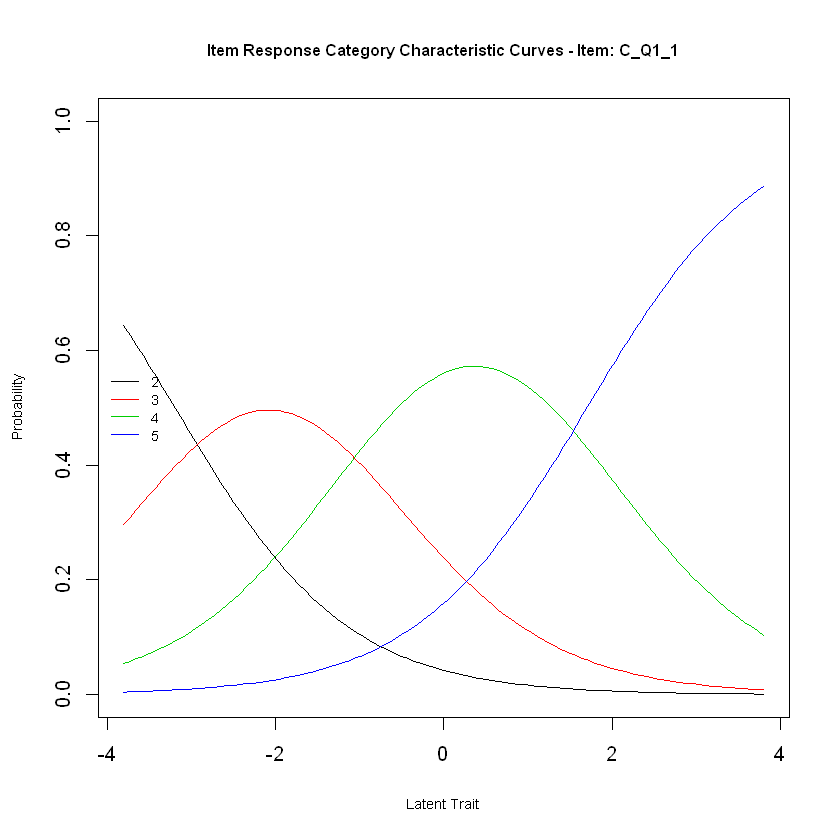

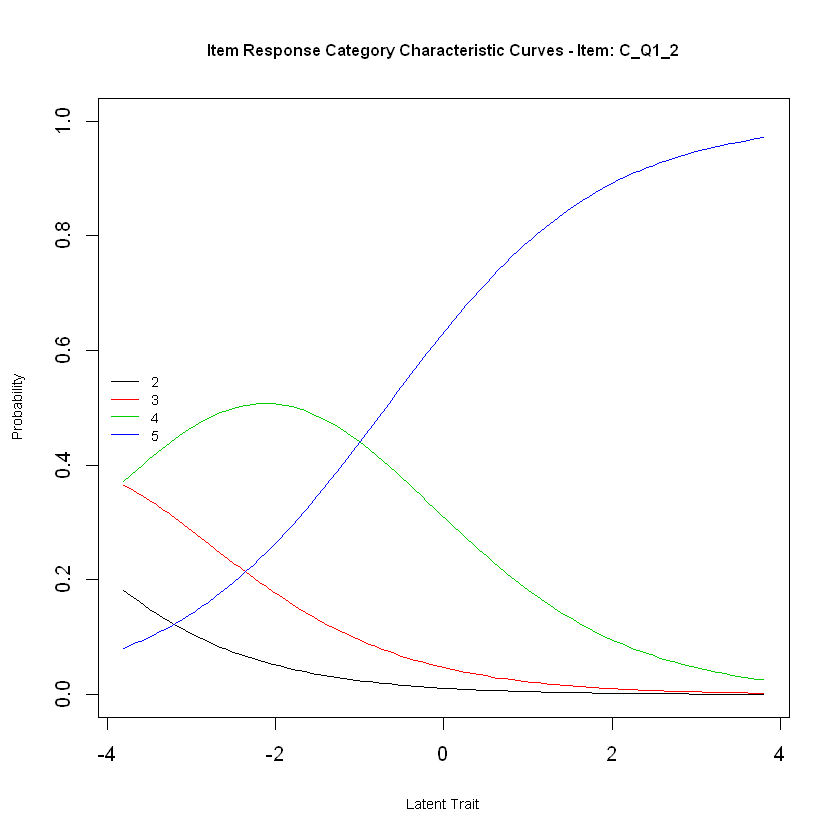

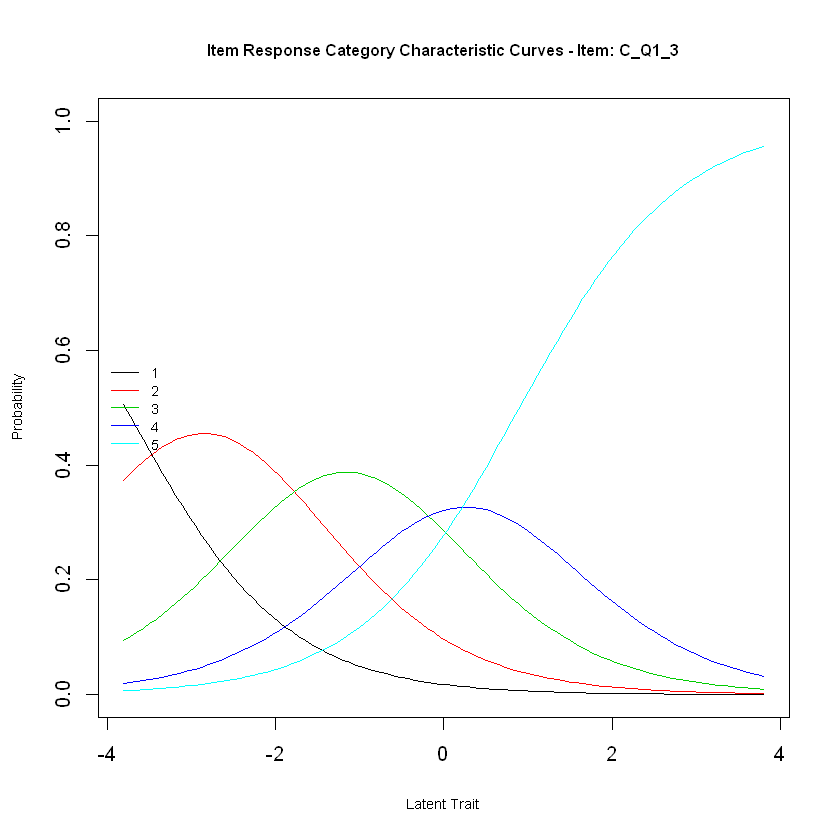

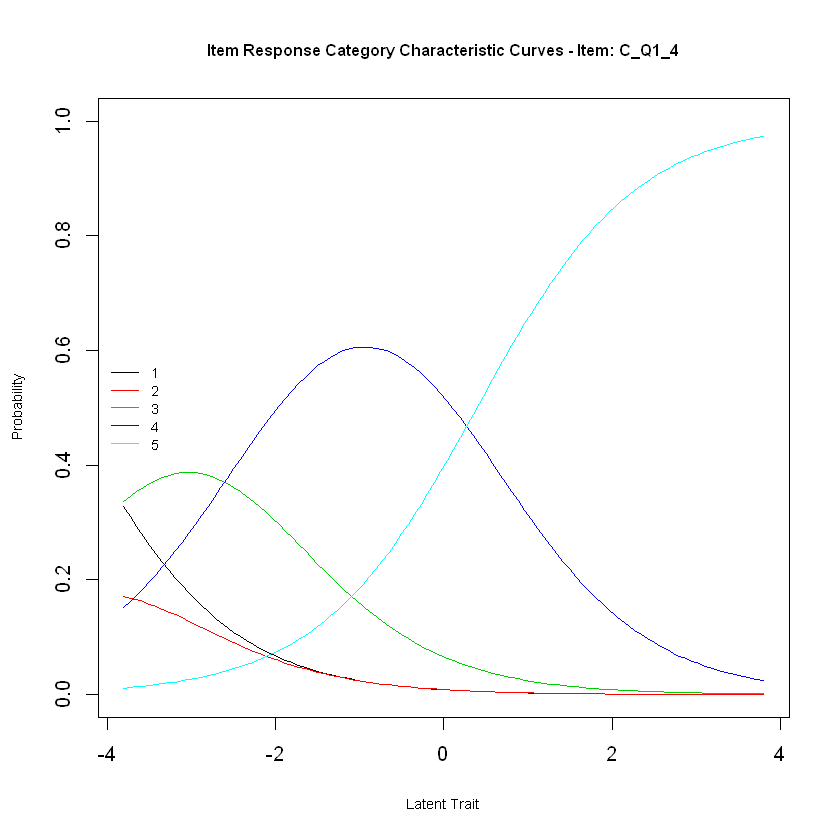

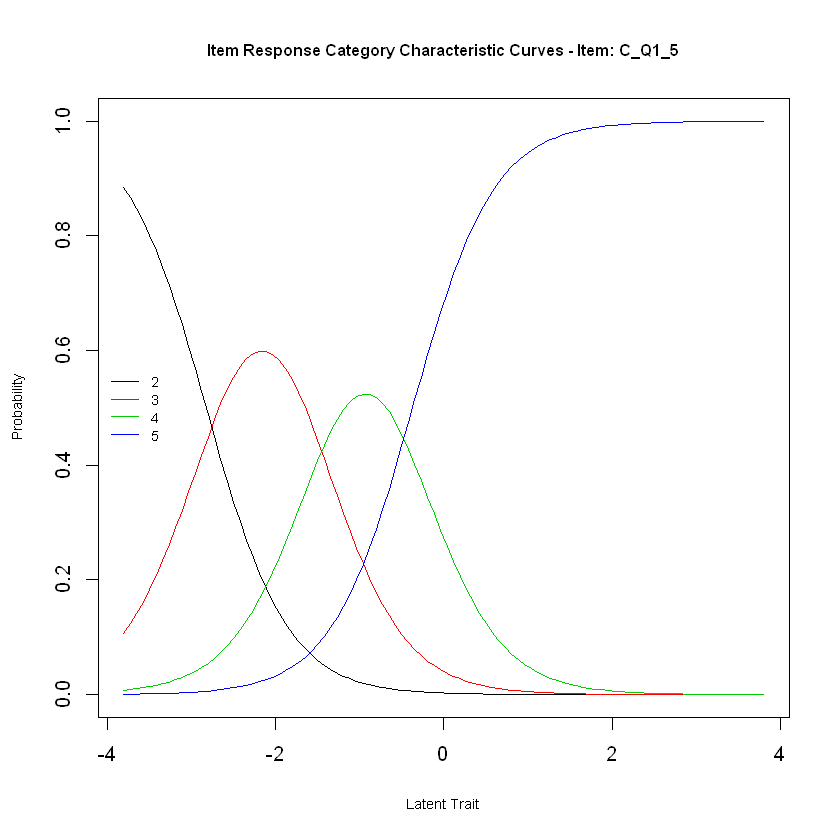

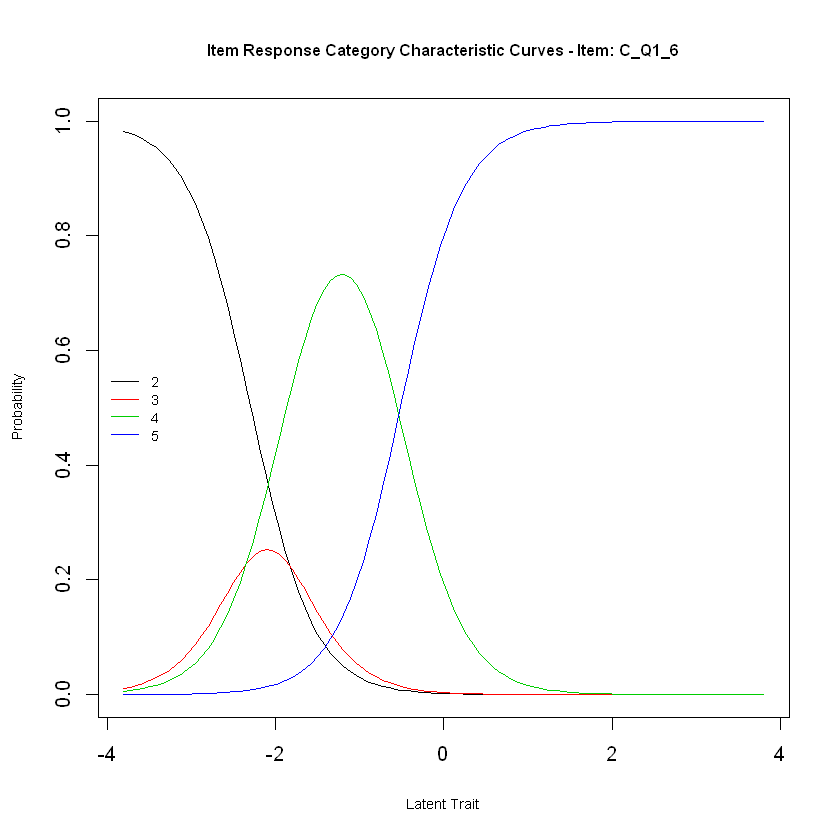

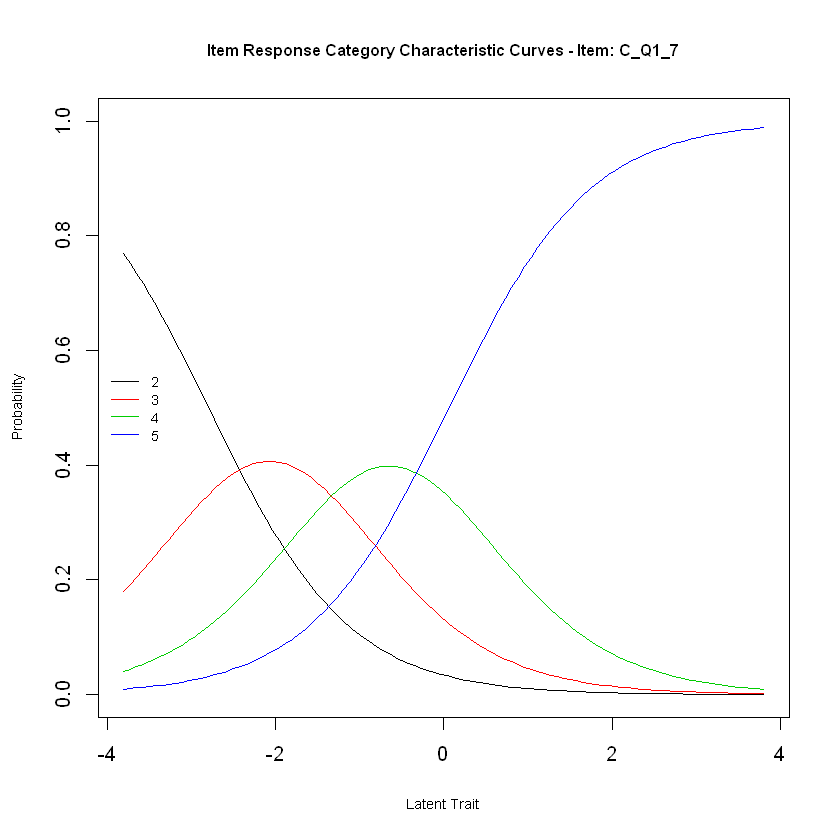

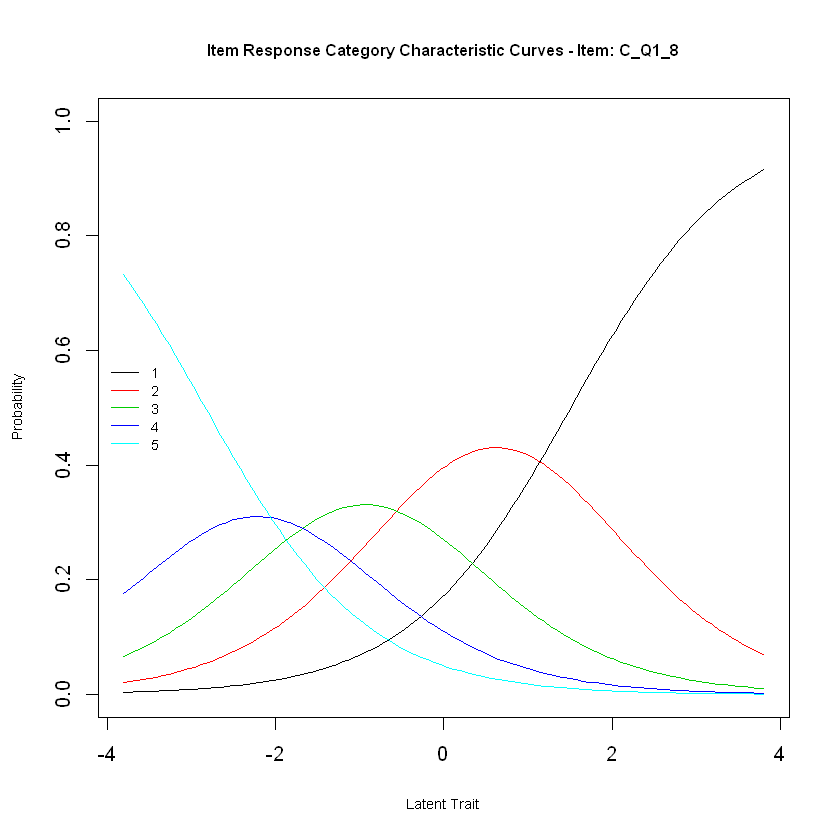

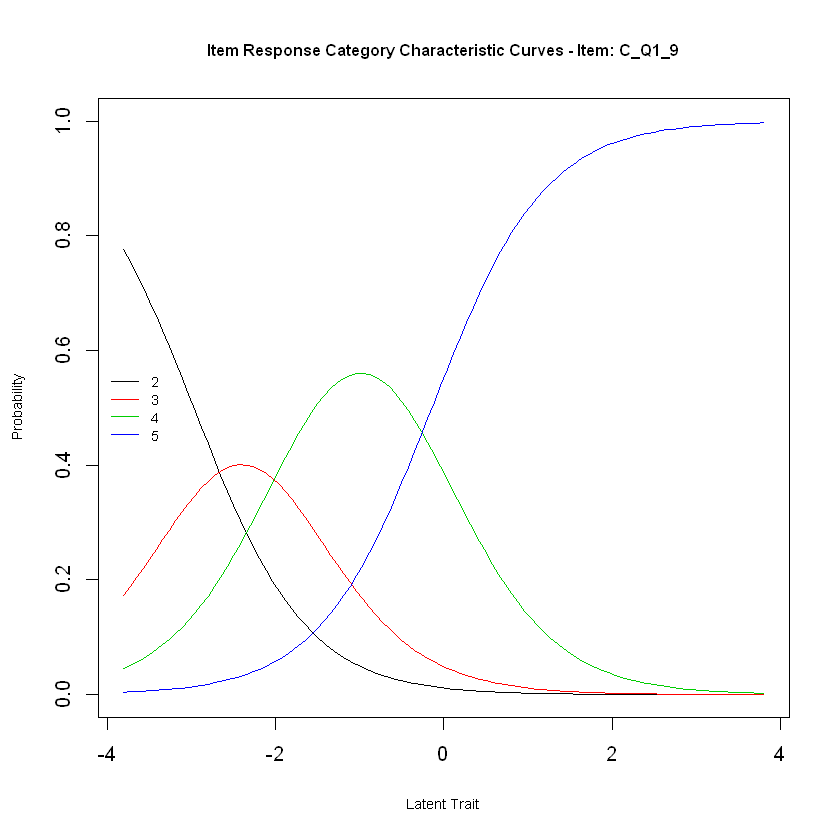

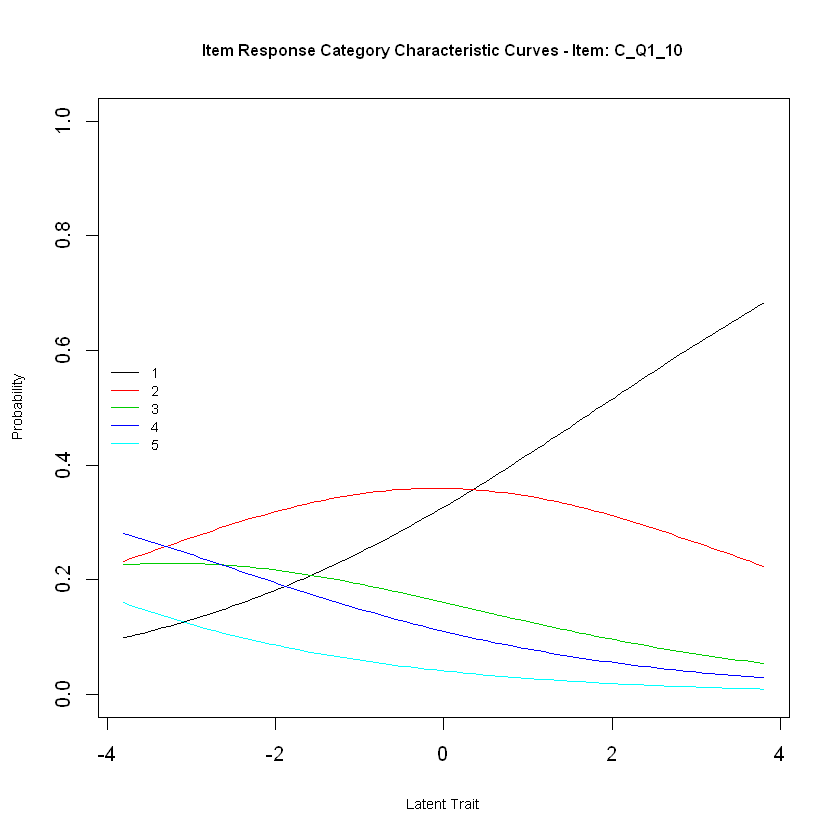

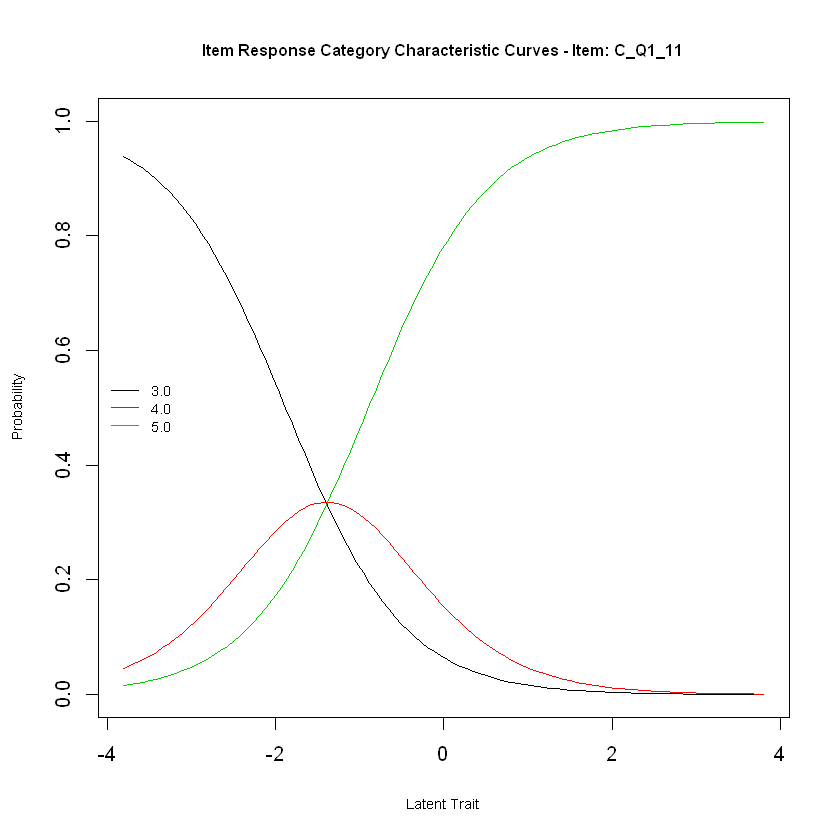

In [161]:
plot(fit2_C, lwd = 1, cex = 0.7, legend = TRUE, cx = "left",xlab = "Latent Trait", cex.main = 0.8, cex.lab = 0.7, cex.axis = 1)

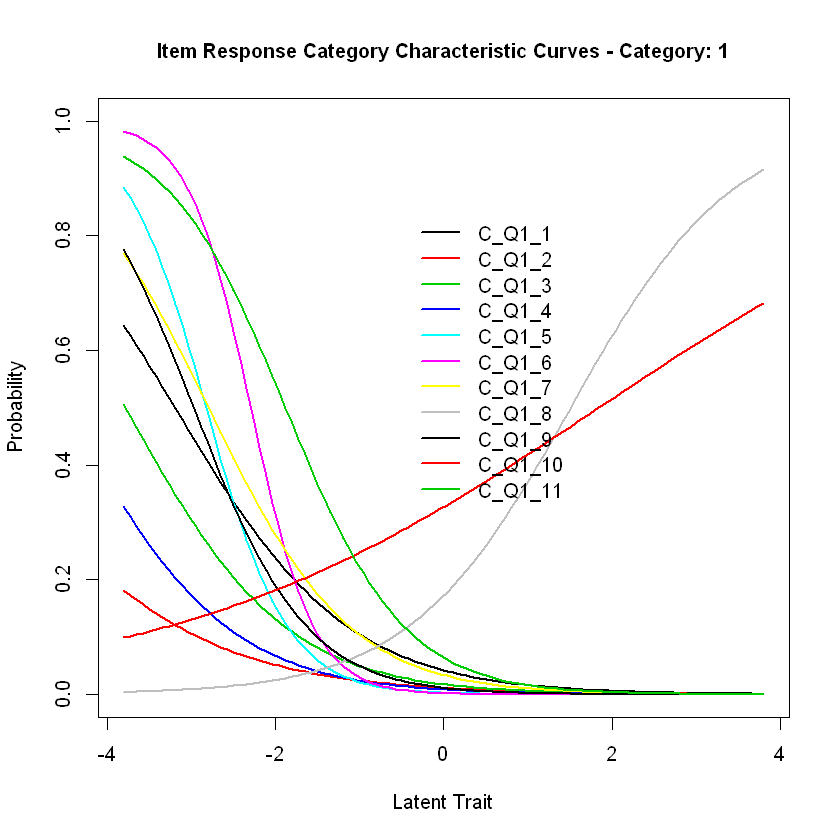

In [162]:
plot(fit2_C, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

In [163]:
information(fit2_C, c(-4, 4))


Call:
grm(data = GRM_CQ1, constrained = FALSE)

Total Information = 31.15
Information in (-4, 4) = 27.37 (87.84%)
Based on all the items


In [164]:
information(fit2_C, c(-4, 4), items = c(2,10))


Call:
grm(data = GRM_CQ1, constrained = FALSE)

Total Information = 2.39
Information in (-4, 4) = 1.32 (55.13%)
Based on items 2, 10


In [165]:
2.39/31.15

[1] 0.07672552

### GRM AQ2

In [166]:
GRM_AQ2 <- data.frame(apply(MyData[,vec_AQ2],2,as.factor))

In [167]:
alpha(data.frame(apply(MyData[,vec_AQ2],2,as.numeric)),check.keys = TRUE)

Warning message in alpha(data.frame(apply(MyData[, vec_AQ2], 2, as.numeric)), check.keys = TRUE):
"Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name."


Reliability analysis   
Call: alpha(x = data.frame(apply(MyData[, vec_AQ2], 2, as.numeric)), 
    check.keys = TRUE)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean  sd
      0.49       0.5    0.58      0.13   1 0.094  3.1 0.5

 lower alpha upper     95% confidence boundaries
0.31 0.49 0.67 

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r  S/N alpha se
A_Q2_1       0.40      0.40    0.47      0.10 0.68    0.110
A_Q2_2       0.45      0.45    0.53      0.12 0.81    0.103
A_Q2_3       0.36      0.34    0.44      0.08 0.52    0.118
A_Q2_4       0.53      0.54    0.59      0.16 1.17    0.087
A_Q2_5-      0.36      0.42    0.45      0.11 0.72    0.121
A_Q2_6-      0.48      0.49    0.53      0.14 0.95    0.098
A_Q2_7-      0.54      0.56    0.61      0.17 1.26    0.087

 Item statistics 
         n raw.r std.r r.cor r.drop mean   sd
A_Q2_1  67  0.59  0.60 0.543  0.329  2.4 1.06
A_Q2_2  67  0.45  0.53 0.398  0.259  3.6 0.74
A_Q2_3  67  0.65  0.70 0

In [168]:
rcor.test(GRM_AQ2, method = "kendall")


       A_Q2_1 A_Q2_2 A_Q2_3 A_Q2_4 A_Q2_5 A_Q2_6 A_Q2_7
A_Q2_1  *****  0.305  0.311  0.154 -0.227 -0.029  0.017
A_Q2_2  0.004  *****  0.343  0.130 -0.016 -0.031  0.010
A_Q2_3  0.003  0.002  *****  0.298 -0.201 -0.110 -0.019
A_Q2_4  0.150  0.241  0.007  *****  0.027  0.122 -0.033
A_Q2_5  0.029  0.881  0.058  0.805  *****  0.404  0.183
A_Q2_6  0.772  0.771  0.288  0.245 <0.001  *****  0.073
A_Q2_7  0.870  0.927  0.862  0.764  0.087  0.481  *****

upper diagonal part contains correlation coefficient estimates 
lower diagonal part contains corresponding p-values


In [169]:
fit1_AQ2 <- grm(GRM_AQ2, constrained = TRUE)
fit2_AQ2 <- grm(GRM_AQ2, constrained = FALSE)

In [170]:
anova(fit1_AQ2,fit2_AQ2)


 Likelihood Ratio Table
             AIC     BIC log.Lik   LRT df p.value
fit1_AQ2 1232.08 1289.40 -590.04                 
fit2_AQ2 1218.70 1289.25 -577.35 25.38  6  <0.001



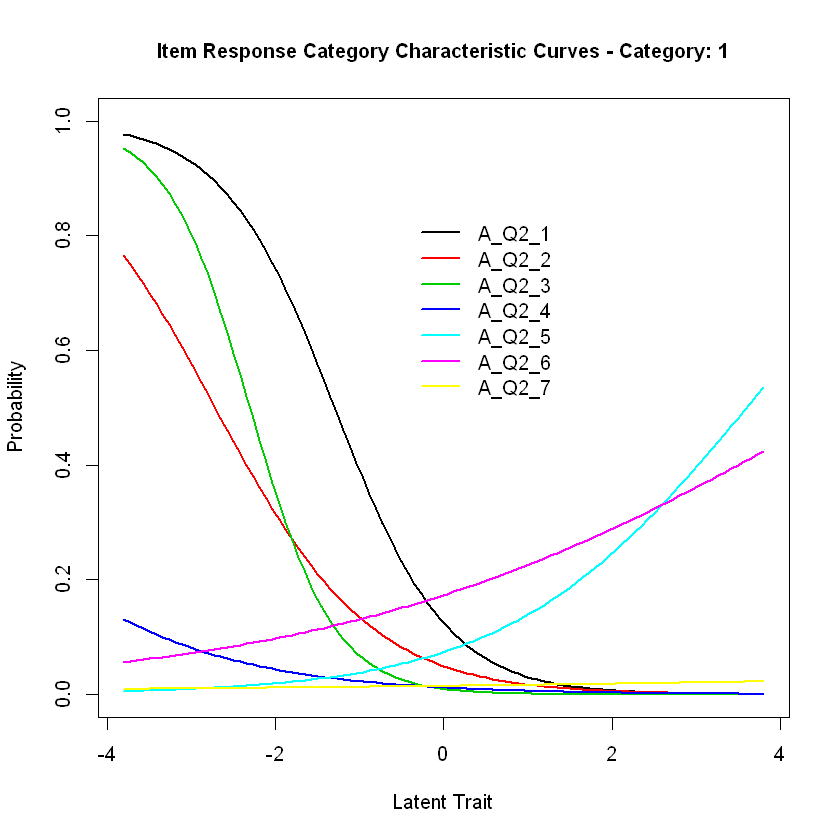

In [171]:
plot(fit2_AQ2, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)